Pass Initial Test, Moving on to Loading Session...


Open Ephys Recording Session Object
Directory: ABATE-008_2025-05-14_14-34-09_001

<object>.recordnodes:
  Index 0: Record Node 106 (binary format)
  Index 1: Record Node 111 (binary format)

Open Ephys GUI Recording
ID: 0x1d18818d810
Format: Binary
Directory: ABATE-008_2025-05-14_14-34-09_001\Record Node 111\experiment1\recording1
Experiment Index: 0
Recording Index: 0
Processor ID: 100, Stream Name: Rhythm Data, Line: 1 (main sync line))
  First event sample number: 2608253
  Last event sample number: 23693992
  Total sync events: 95
  Sample rate: 20000.0
Data shape: (21424395, 5)
Loaded 107 MessageCenter entries
[Time: 130.389750 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 139.462850 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 145.284600 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 150.166400 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 162.797750 s] Message: RHDCONTROL TRIGGER 1 100.0
[Time: 198.514650 s] Message: Laster se

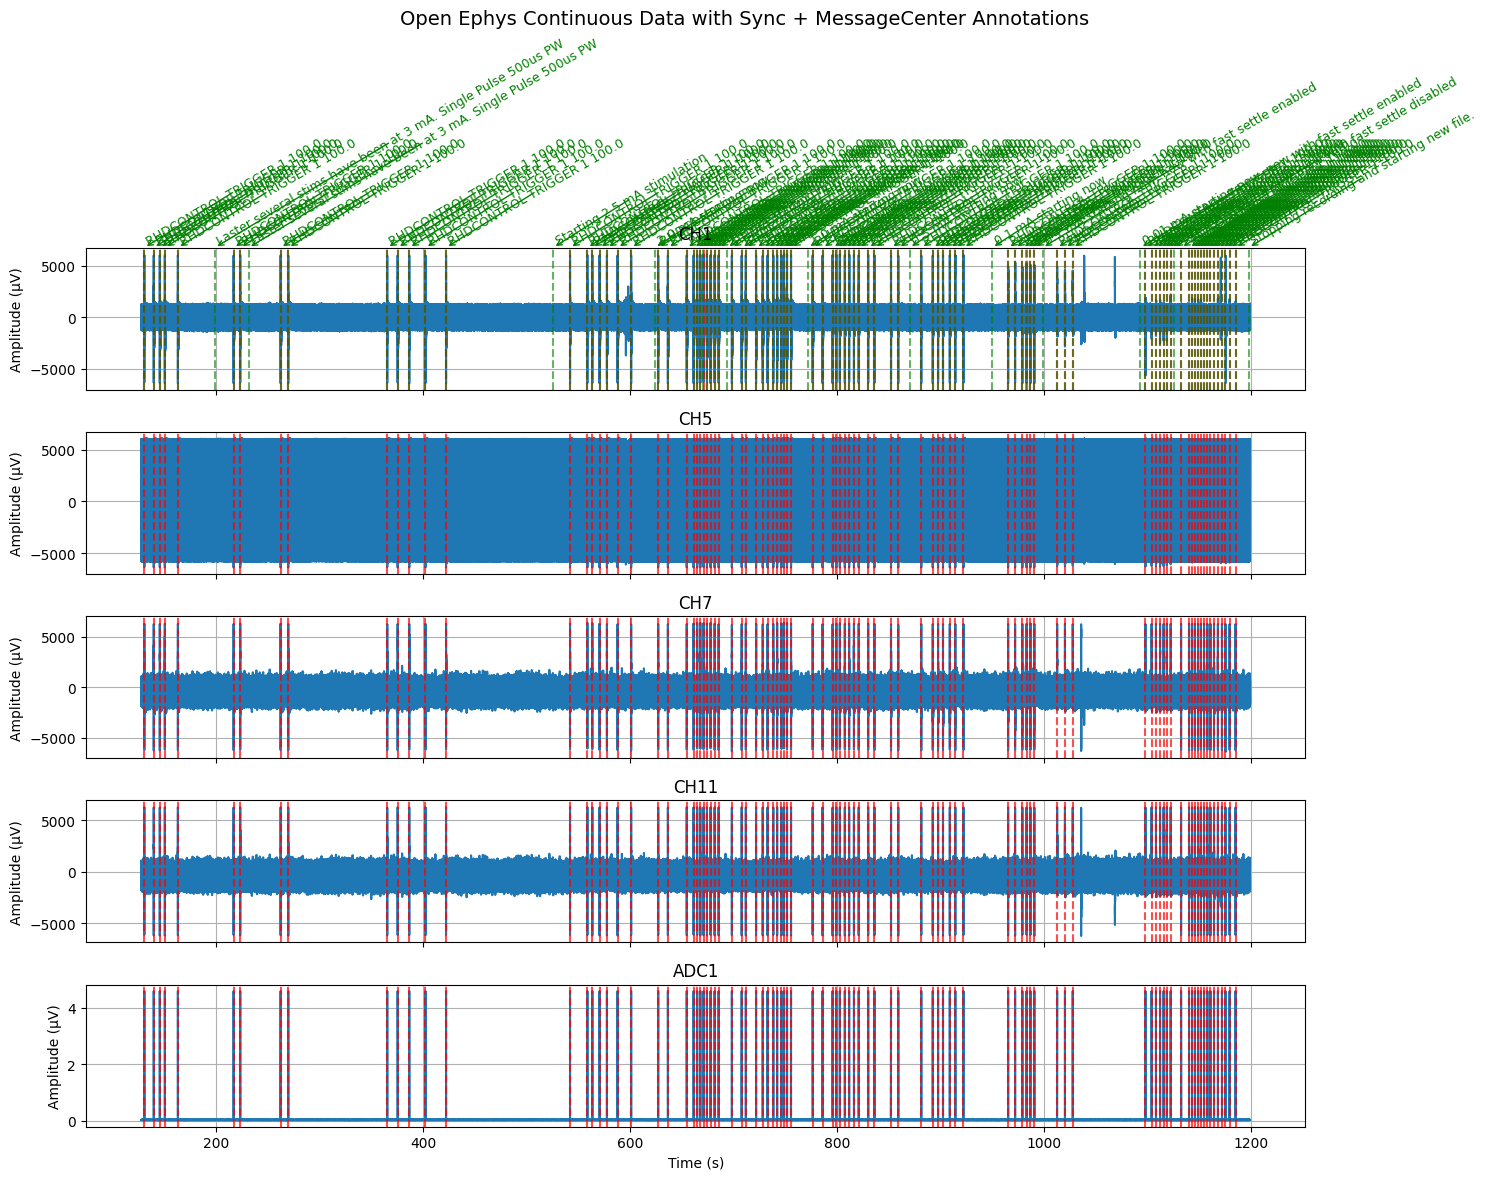

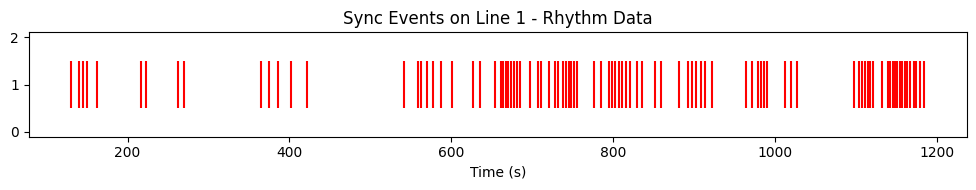

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from open_ephys.analysis import Session

# Load the session
directory = 'ABATE-008_2025-05-14_14-34-09_001'
session = Session(directory)

print('Pass Initial Test, Moving on to Loading Session...\n')
print(session)
print(session.recordnodes[1].recordings[0])



# Load specific recording
recording = session.recordnodes[1].recordings[0]

# Add sync line and compute global timestamps
recording.add_sync_line(
    1,               # TTL line number
    100,             # processor ID
    'Rhythm Data',   # Stream name (verify this matches your metadata)
    main=True        # Set this stream as reference
)
recording.compute_global_timestamps()

# Extract metadata and global timestamps
metadata = recording.continuous[0].metadata
channel_names = metadata['channel_names']
timestamps = recording.continuous[0].timestamps
data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=timestamps.shape[0])
print("Data shape:", data.shape)

# Filter sync events for Line 1
events = recording.events
sync_events = events[
    (events.line == 1) &
    (events.processor_id == 100) &
    (events.stream_name == 'Rhythm Data') &
    (events.state == 1)
]
sync_timestamps = sync_events['timestamp'].to_numpy()

# Load MessageCenter files
messagecenter_dir = os.path.join(directory, "Record Node 111", "experiment1", "recording1", "events", "MessageCenter")
texts = np.load(os.path.join(messagecenter_dir, "text.npy"), allow_pickle=True)
timestamps_msg = np.load(os.path.join(messagecenter_dir, "timestamps.npy"))
sample_numbers = np.load(os.path.join(messagecenter_dir, "sample_numbers.npy"))

# Decode message texts
decoded_texts = [t.decode('utf-8') if isinstance(t, bytes) else str(t) for t in texts]

# Debug print
print(f"Loaded {len(decoded_texts)} MessageCenter entries")
for text, time in zip(decoded_texts, timestamps_msg):
    print(f"[Time: {time:.6f} s] Message: {text}")

# Plot continuous data
fig, axes = plt.subplots(len(channel_names), 1, figsize=(15, 12), sharex=True)

for idx, ax in enumerate(axes):
    ax.plot(timestamps, data[:, idx], label=channel_names[idx])
    for t in sync_timestamps:
        ax.axvline(x=t, color='red', linestyle='--', alpha=0.7, label='Sync Event' if t == sync_timestamps[0] else "")
    ax.set_ylabel('Amplitude (μV)')
    ax.set_title(channel_names[idx])
    ax.grid(True)
    if idx == 0:  # Only annotate messages on topmost plot (Ch5)
        for time, msg in zip(timestamps_msg, decoded_texts):
            ax.axvline(x=time, color='green', linestyle='--', alpha=0.6)
            ax.annotate(
                msg,
                xy=(time, ax.get_ylim()[1]),
                xytext=(time + 0.1, ax.get_ylim()[1] * 1.05),
                rotation=30,  # angled, not vertical
                fontsize=9,
                color='green',
                arrowprops=dict(arrowstyle='->', color='green', lw=1),
                ha='left'
            )

axes[-1].set_xlabel('Time (s)')
plt.tight_layout(rect=[0, 0, 1, 0.97])  # Leave space at top
plt.suptitle('Open Ephys Continuous Data with Sync + MessageCenter Annotations', fontsize=14)
plt.show()

# Optional: standalone sync event plot
plt.figure(figsize=(10, 2))
plt.eventplot(sync_timestamps, orientation='horizontal', colors='red')
plt.title(f'Sync Events on Line 1 - Rhythm Data')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()


Pass Initial Test, Moving on to Loading Session...


Open Ephys Recording Session Object
Directory: ABATE-008_2025-05-14_14-34-09_001

<object>.recordnodes:
  Index 0: Record Node 106 (binary format)
  Index 1: Record Node 111 (binary format)

Open Ephys GUI Recording
ID: 0x1d19f76ff50
Format: Binary
Directory: ABATE-008_2025-05-14_14-34-09_001\Record Node 111\experiment1\recording1
Experiment Index: 0
Recording Index: 0
Processor ID: 100, Stream Name: Rhythm Data, Line: 1 (main sync line))
  First event sample number: 2608253
  Last event sample number: 23693992
  Total sync events: 95
  Sample rate: 20000.0
{'source_node_id': 100, 'source_node_name': 'Acquisition Board', 'stream_name': 'Rhythm Data', 'sample_rate': 20000.0, 'num_channels': 5, 'channel_names': ['CH1', 'CH5', 'CH7', 'CH11', 'ADC1'], 'bit_volts': [0.1949999928474426, 0.1949999928474426, 0.1949999928474426, 0.1949999928474426, 0.000152587890625]} 

Channels: ['CH1', 'CH5', 'CH7', 'CH11', 'ADC1'] 

Data shape: (21424395, 

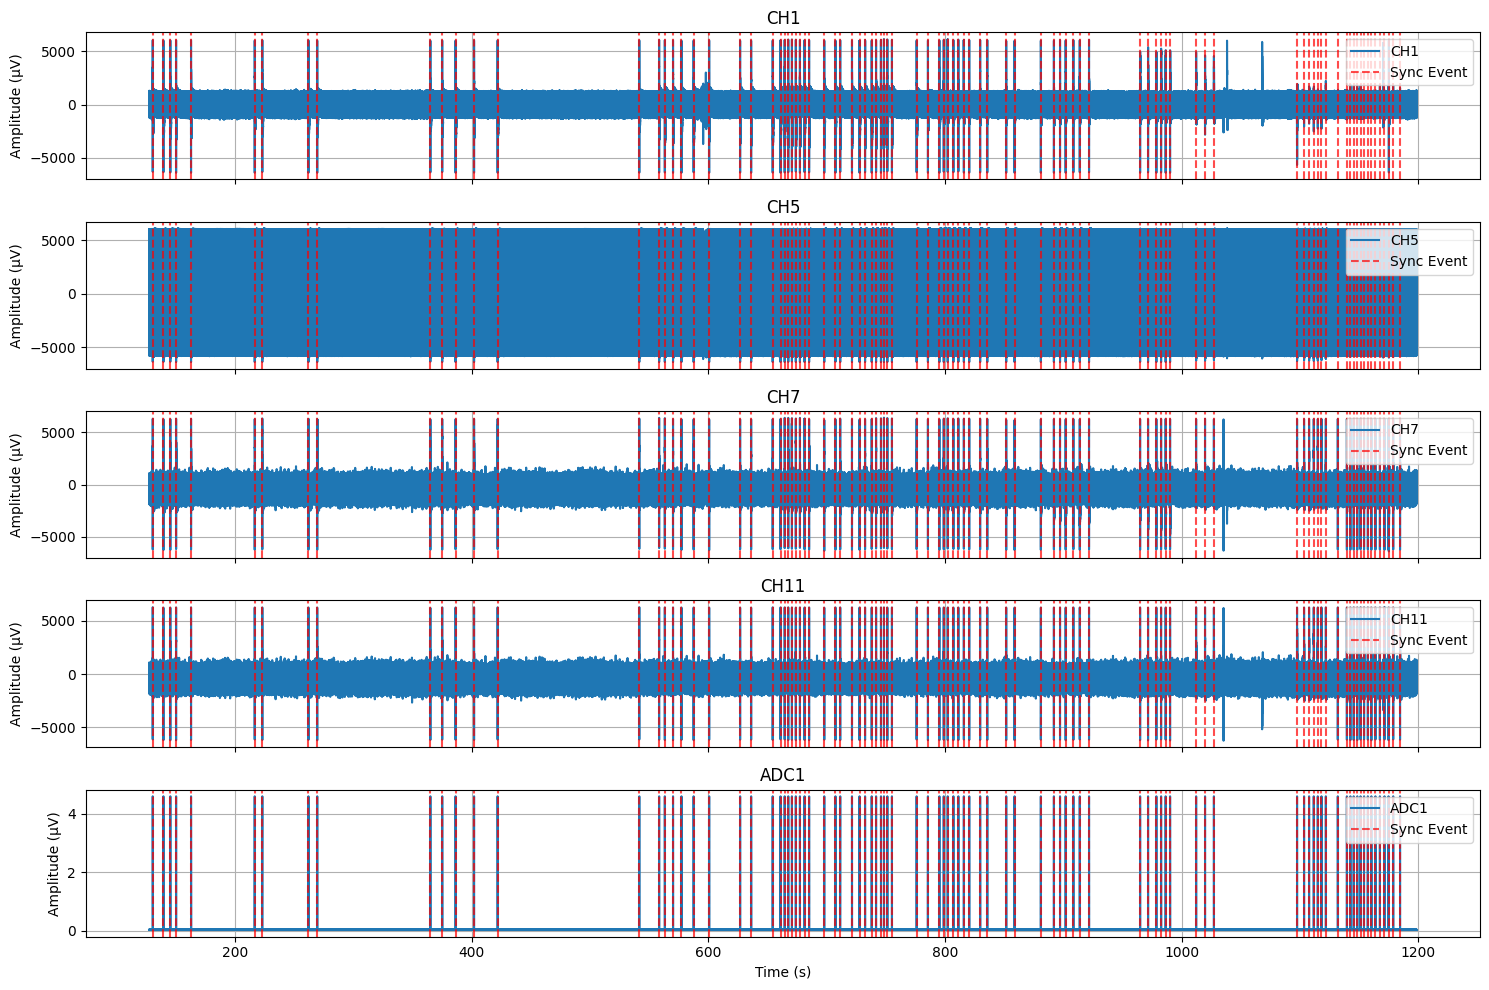

C:\Users\dal866445\AppData\Local\Temp\ipykernel_56612\2888305322.py:86: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\dal866445\Documents\Github\open-ephys-python-tools\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


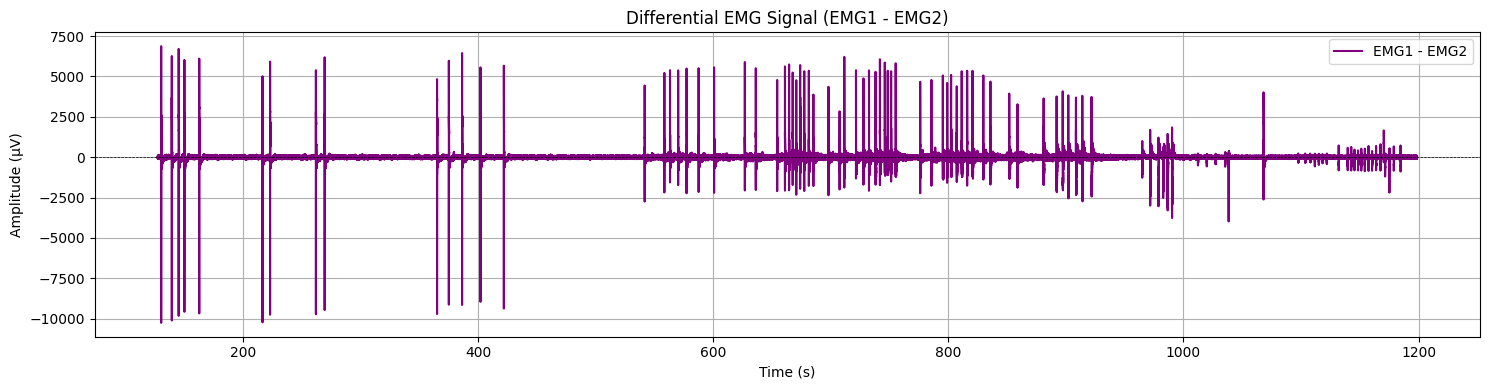


Total sync events found (used for peri-stimulus plots): 95
Total peri-stimulus plots generated: 95


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from open_ephys.analysis import Session

# Load the session
directory = 'ABATE-008_2025-05-14_14-34-09_001'
session = Session(directory)

print('Pass Initial Test, Moving on to Loading Session...\n')
print(session)
print(session.recordnodes[1].recordings[0])

# Load specific recording
recording = session.recordnodes[1].recordings[0]

# Add sync line and compute global timestamps
recording.add_sync_line(
    1,               # TTL line number
    100,             # processor ID
    'Rhythm Data',   # Stream name (verify this matches your metadata)
    main=True        # Set this stream as reference
)
recording.compute_global_timestamps()

# Extract metadata and global timestamps
metadata = recording.continuous[0].metadata
print(metadata, '\n')
channel_names = metadata['channel_names']
print("Channels:", channel_names, '\n')

# Load continuous data using global timestamps
timestamps = recording.continuous[0].timestamps
n_timestamps = timestamps.shape[0]
data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=n_timestamps)
print("Data shape:", data.shape)

# Filter sync events for Line 1
events = recording.events
sync_events = events[
    (events.line == 1) &
    (events.processor_id == 100) &
    (events.stream_name == 'Rhythm Data') &
    (events.state == 1)
]
sync_timestamps = sync_events['timestamp'].to_numpy()

# List all unique TTL events
unique_events = recording.events[['line', 'processor_id', 'stream_name']].drop_duplicates()
print('List all unique TTL events (line, processor_id, stream_name)\n')
print(unique_events, '\n')

# Count how many times each TTL line fires
event_counts = recording.events.groupby(['line', 'processor_id', 'stream_name']).size()
print('Count how many times each TTL line fires\n')
print(event_counts.sort_values(ascending=False), '\n')

# Plot one subplot per channel
fig, axes = plt.subplots(len(channel_names), 1, figsize=(15, 10), sharex=True)

for idx, ax in enumerate(axes):
    ax.plot(timestamps, data[:, idx], label=channel_names[idx])
    for t in sync_timestamps:
        ax.axvline(x=t, color='red', linestyle='--', alpha=0.7, label='Sync Event' if t == sync_timestamps[0] else "")
    ax.set_ylabel('Amplitude (μV)')
    ax.set_title(f"{channel_names[idx]}")
    ax.grid(True)
    ax.legend(loc='upper right')

axes[-1].set_xlabel('Time (s)')
plt.tight_layout()
plt.show()

# ======= NEW: Plot Differential EMG1 - EMG2 =======
emg1 = data[:, 2]  # Assuming channel 2 is EMG1 (CH7)
emg2 = data[:, 3]  # Assuming channel 3 is EMG2 (CH11)
differential_emg = emg1 - emg2

plt.figure(figsize=(15, 4))
plt.plot(timestamps, differential_emg, label="EMG1 - EMG2", color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("Differential EMG Signal (EMG1 - EMG2)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ======= COUNT # OF PLOTS =======
# Count total sync events and generated peri-stimulus plots
n_sync_events = len(sync_timestamps)
print(f"\nTotal sync events found (used for peri-stimulus plots): {n_sync_events}")

# Each sync event generates one peri-stimulus plot
print(f"Total peri-stimulus plots generated: {n_sync_events}")

pre_event_time = 5  #define time in ms to plot before the event
post_event_time = 20    #define time in ms to plot after the event

valid_plot_count = 0
for stamp in sync_timestamps:
    stamp_pre = stamp - pre_event_time / 1000
    stamp_end = stamp + post_event_time / 1000
    
    # Skip if outside bounds
    if stamp_pre < timestamps[0] or stamp_end > timestamps[-1]:
        continue
    
    idx_event = np.where(timestamps >= stamp)[0][0]
    idx_start_pre = np.where(timestamps >= stamp_pre)[0][0]
    idx_end = np.where(timestamps >= stamp_end)[0][0]

    event_diff_emg = differential_emg[idx_start_pre:idx_end]


In [ ]:
metadata
metadata['sample_rate']
stamp

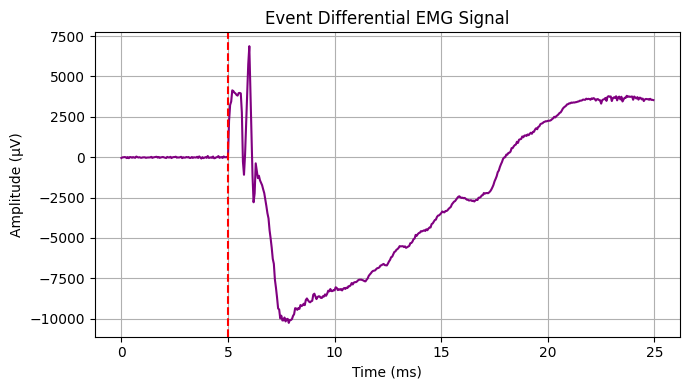

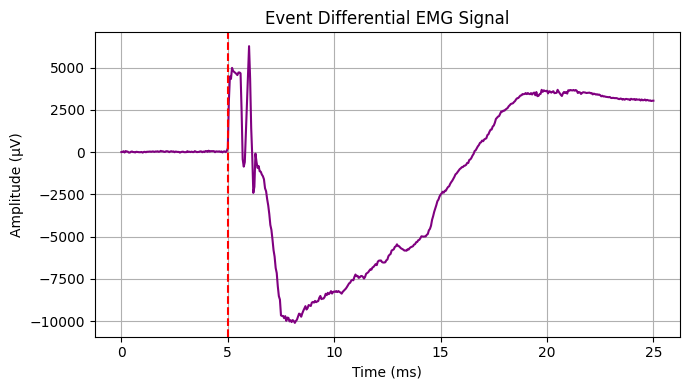

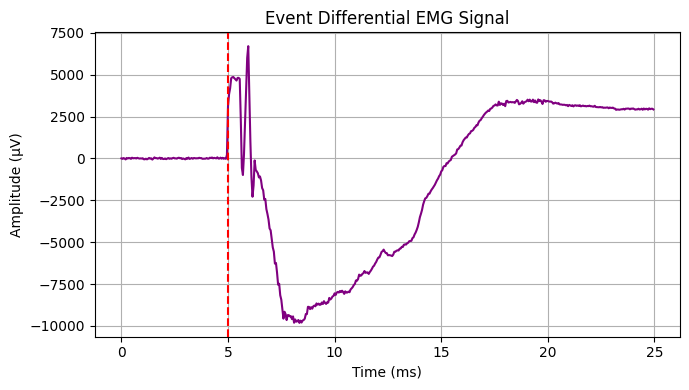

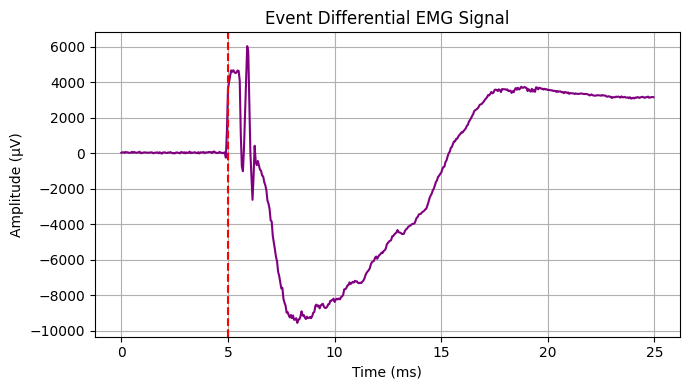

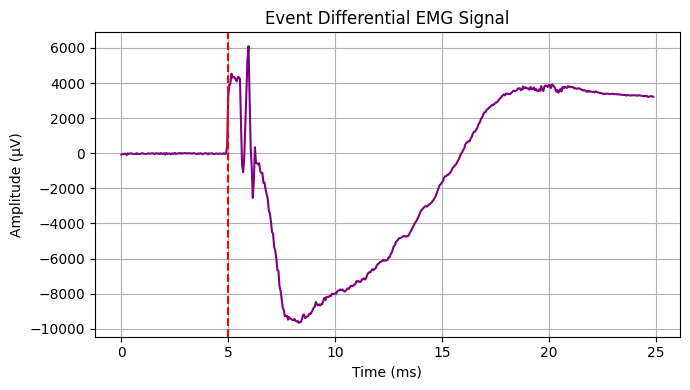

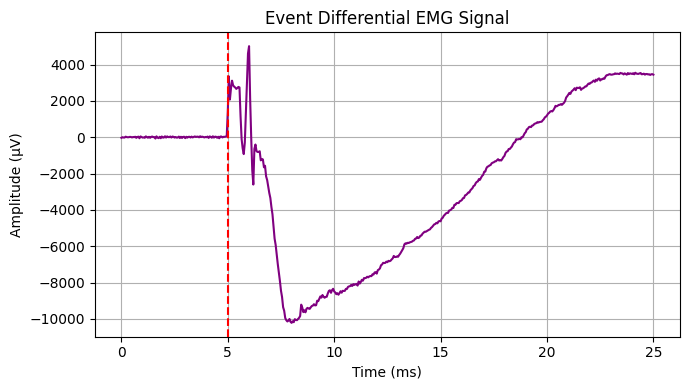

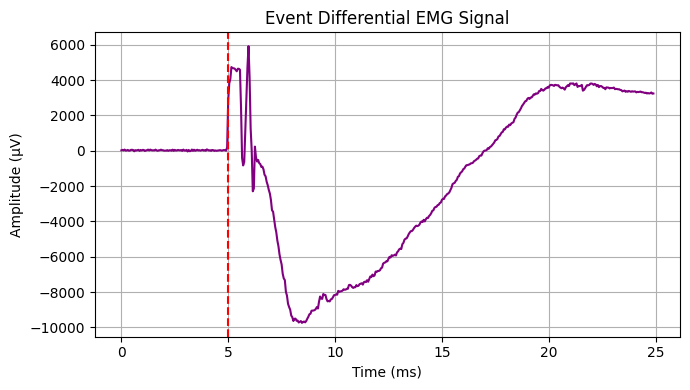

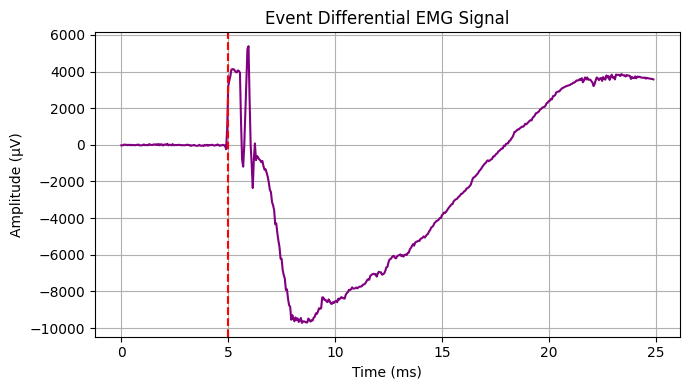

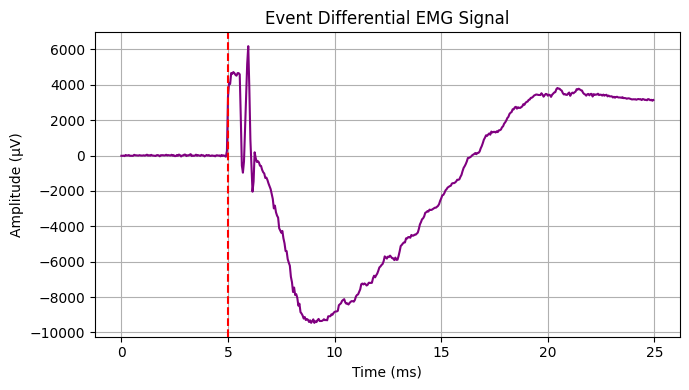

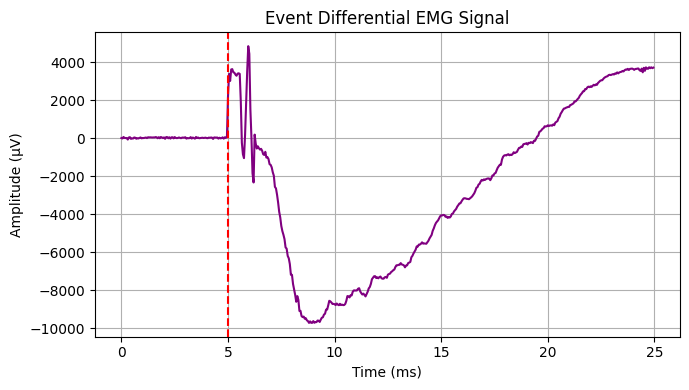

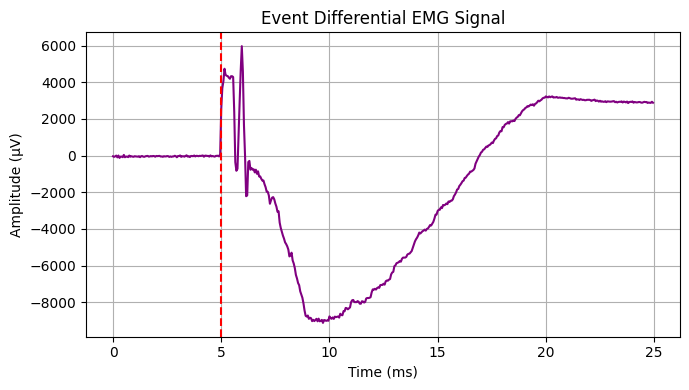

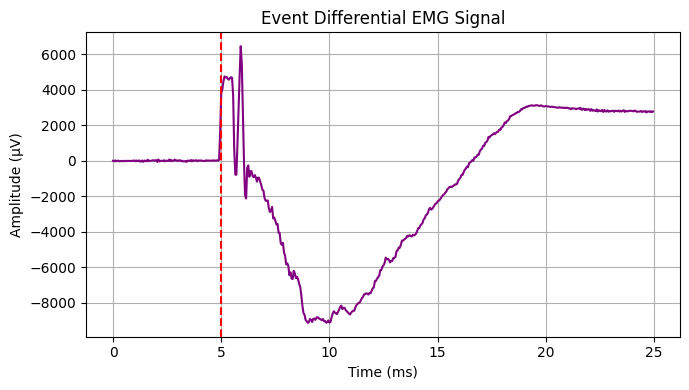

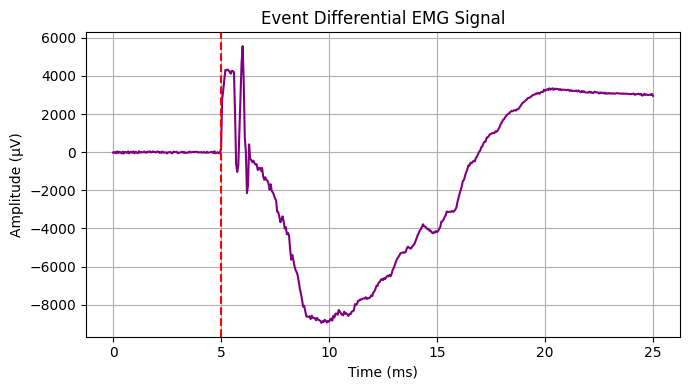

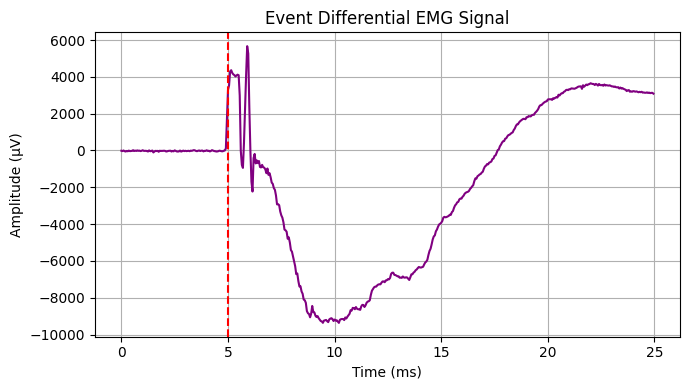

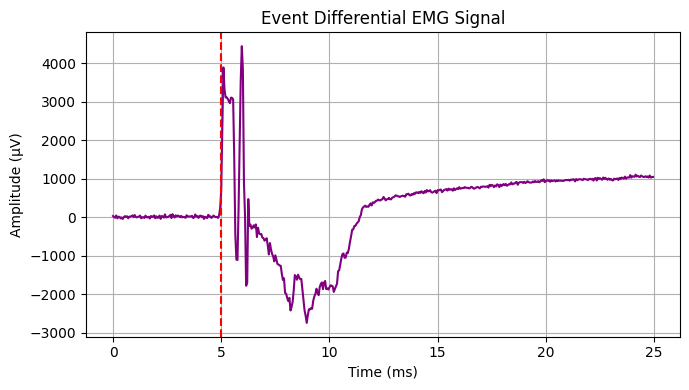

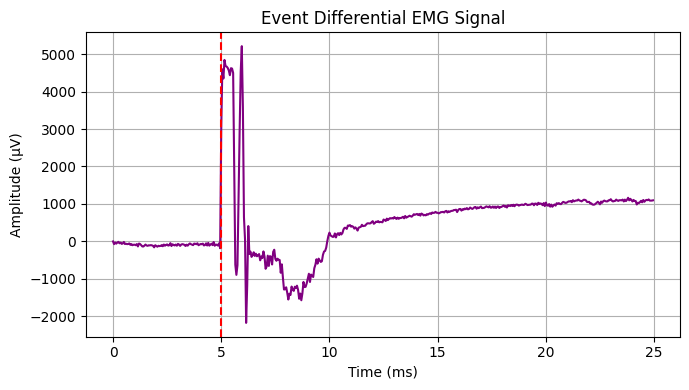

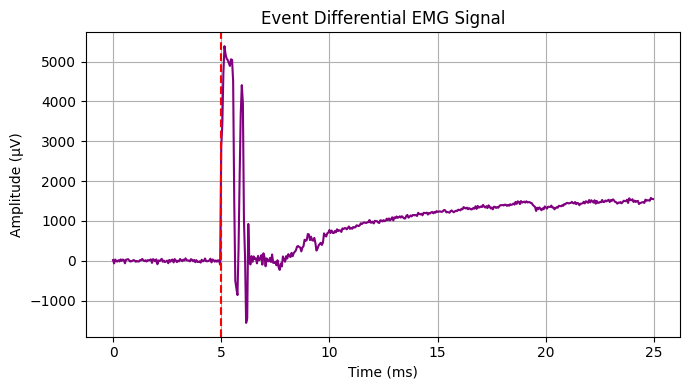

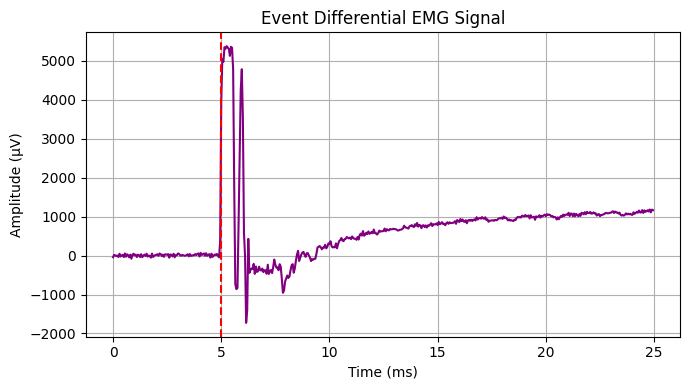

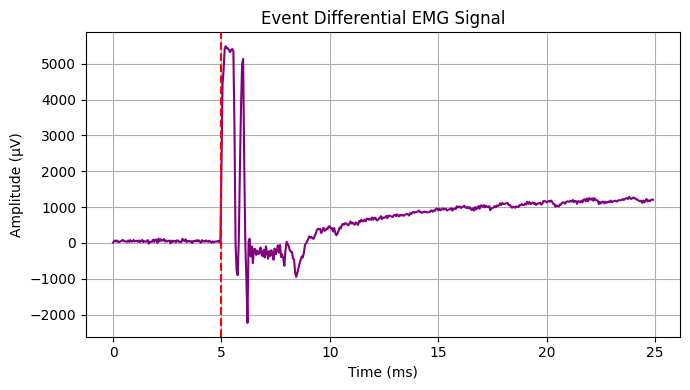

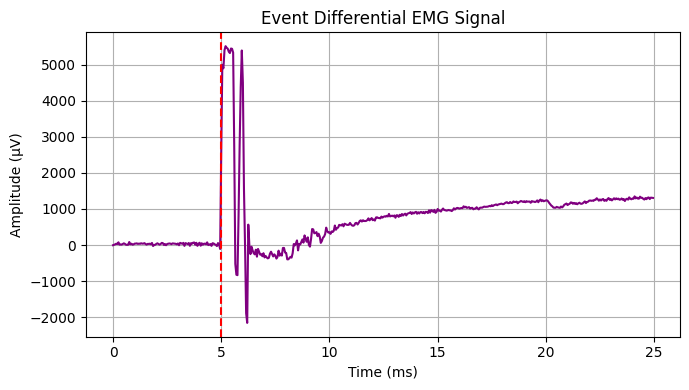

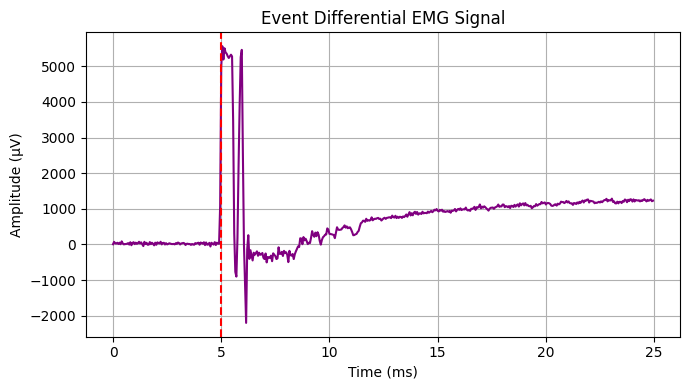

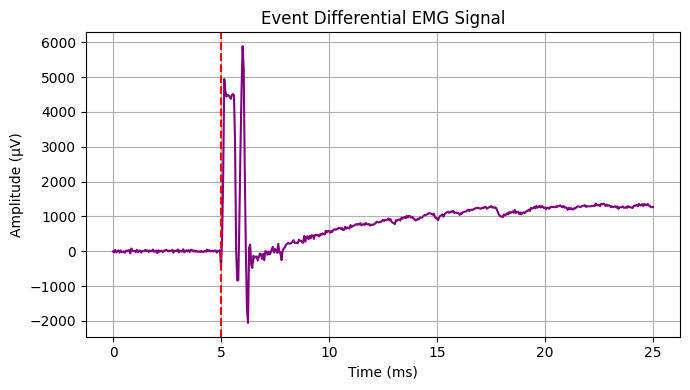

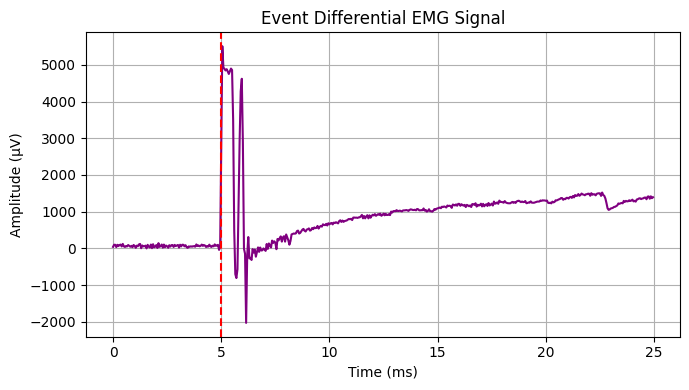

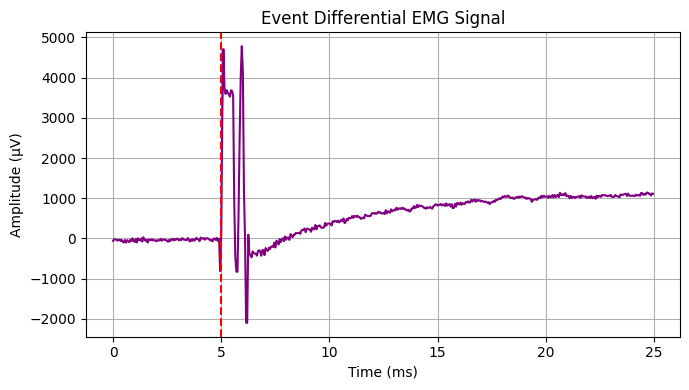

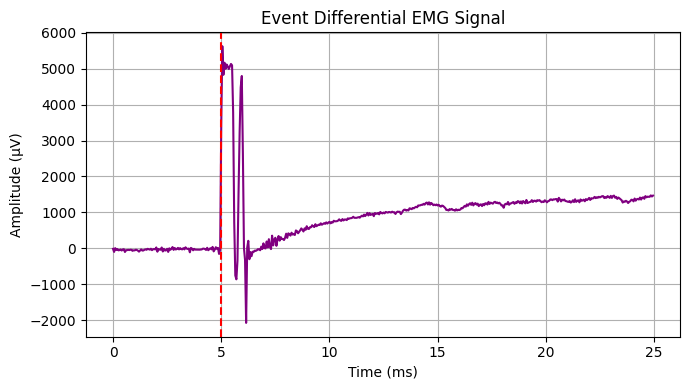

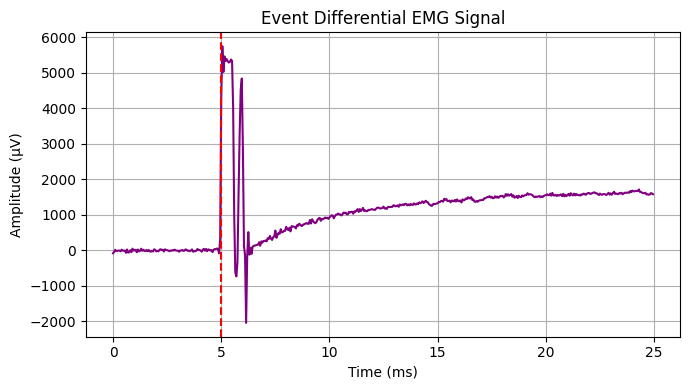

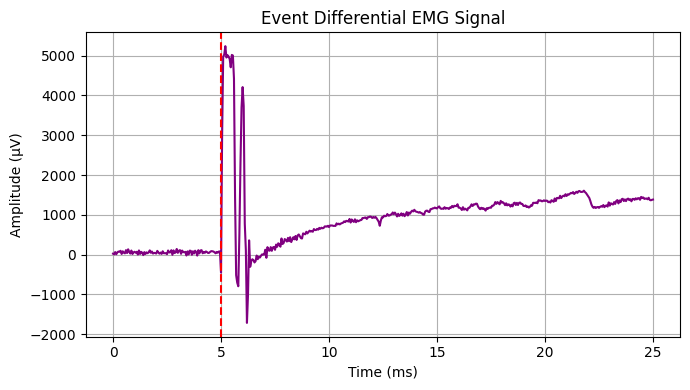

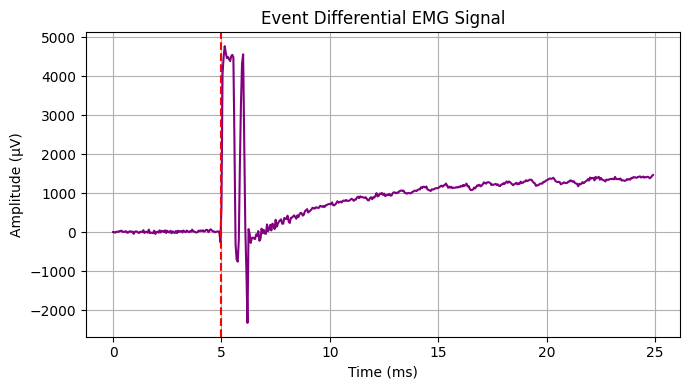

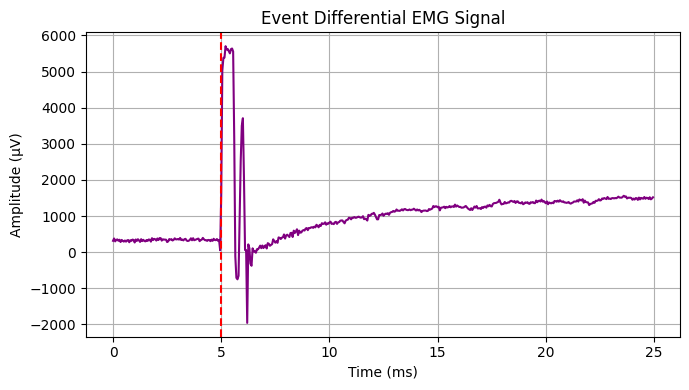

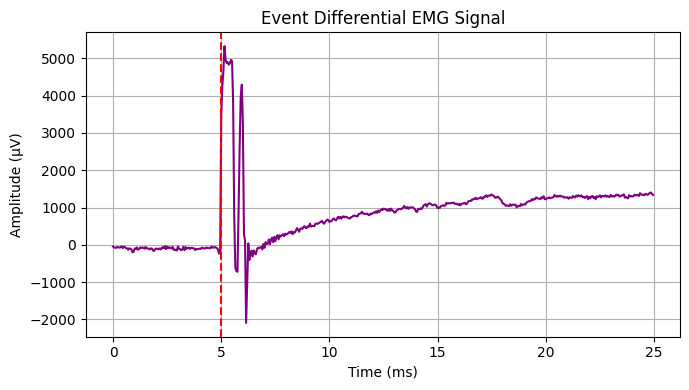

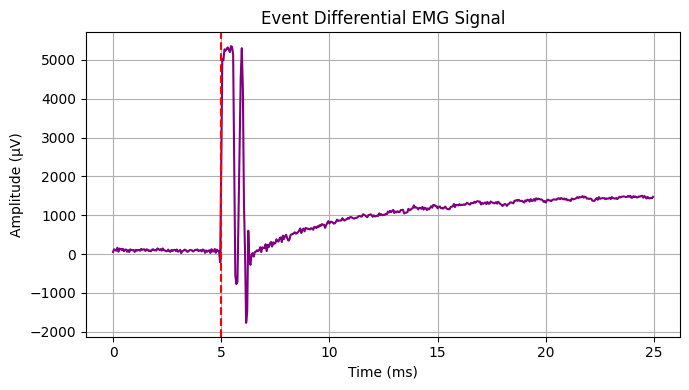

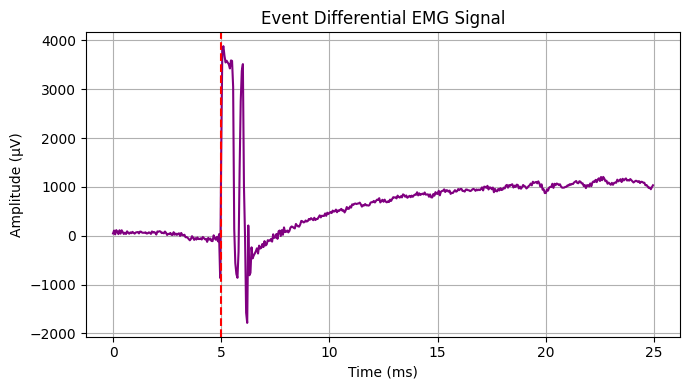

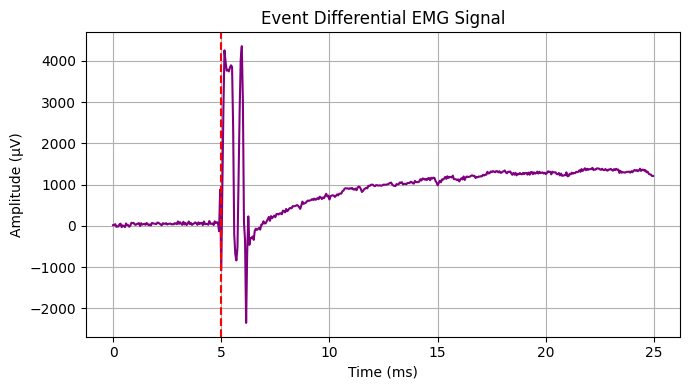

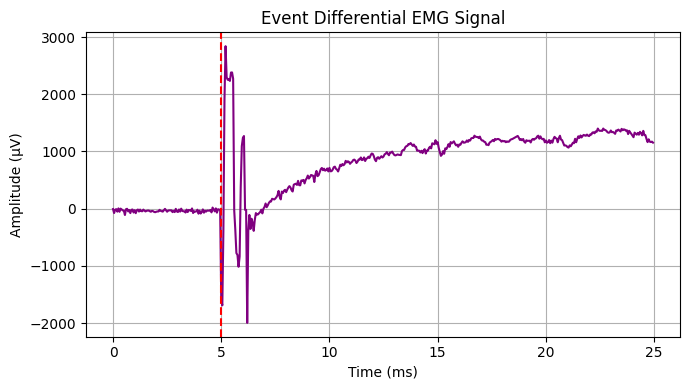

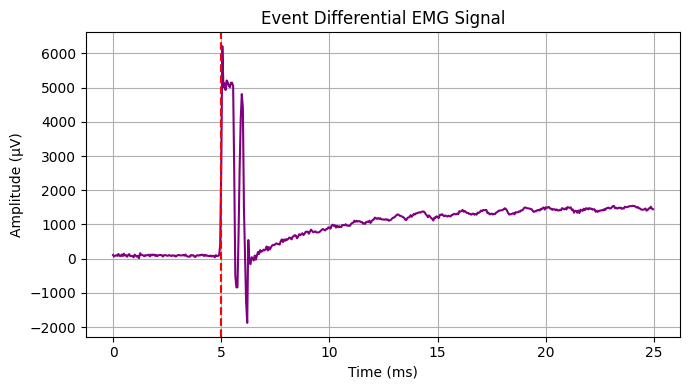

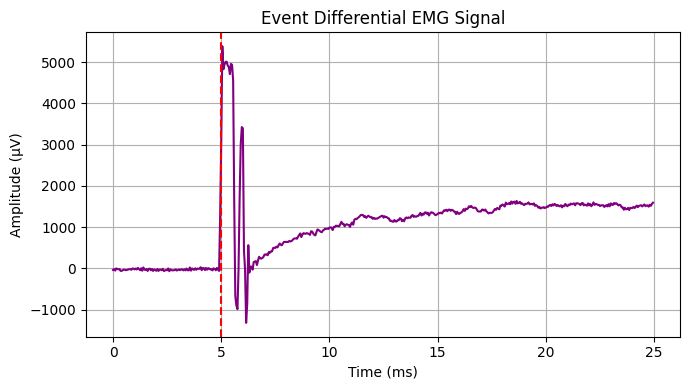

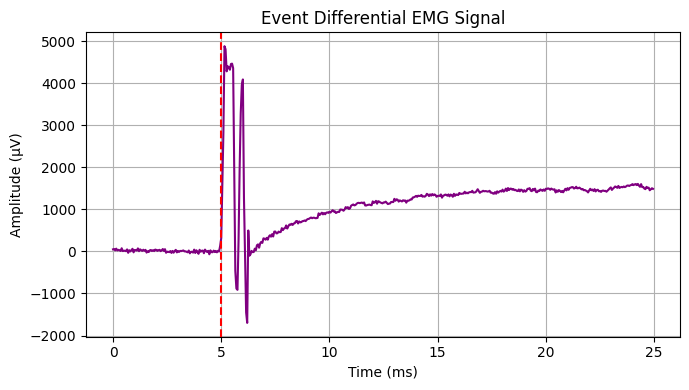

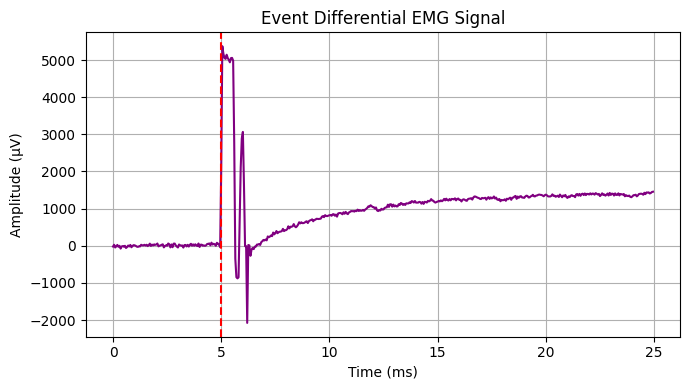

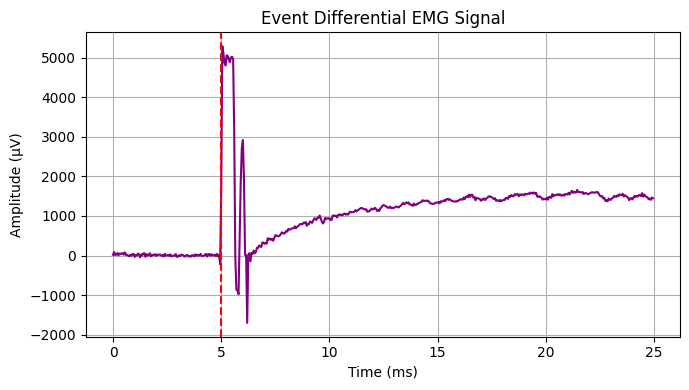

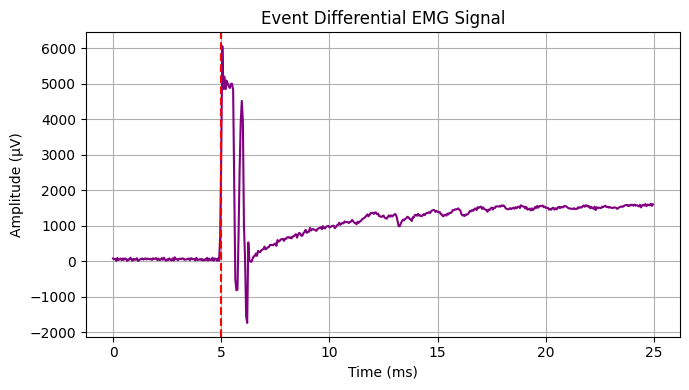

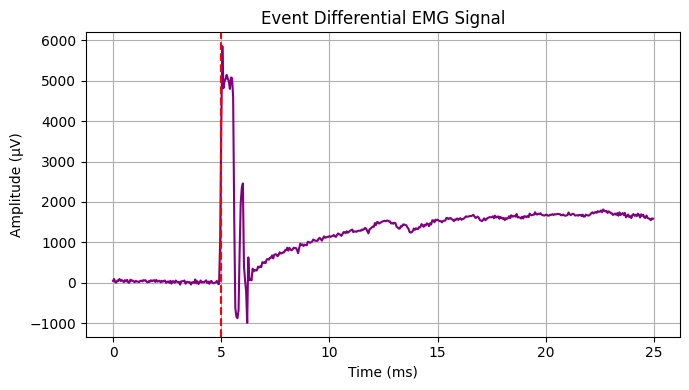

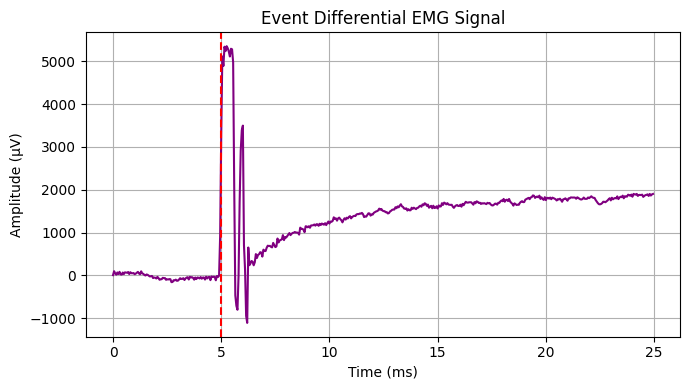

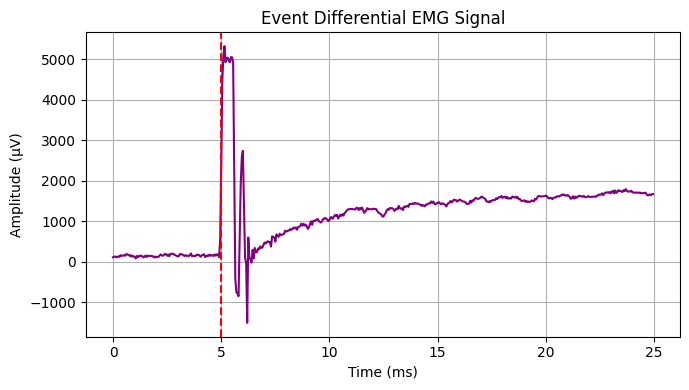

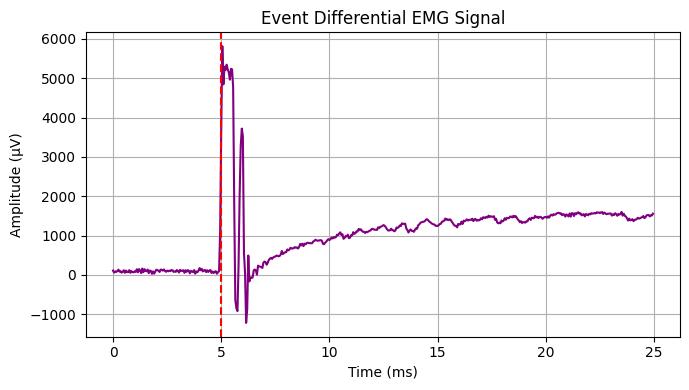

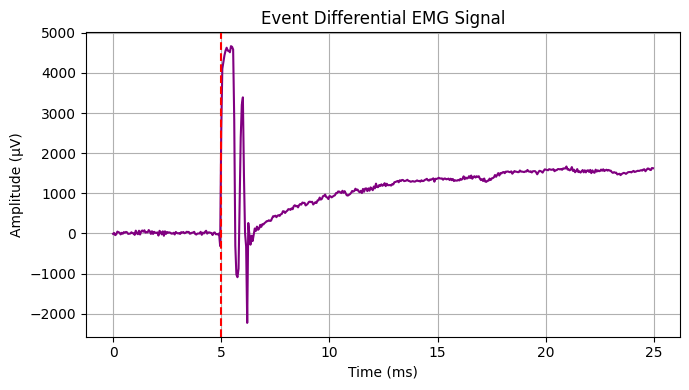

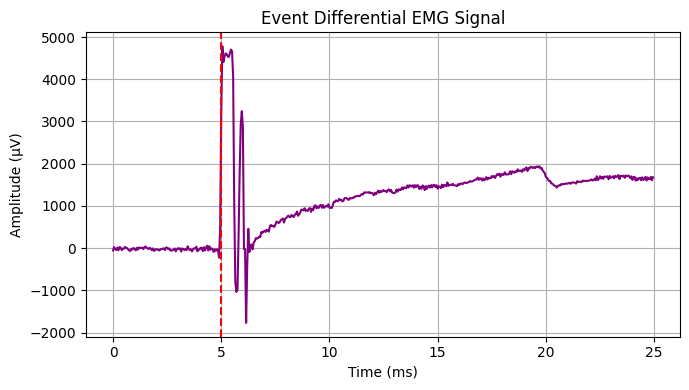

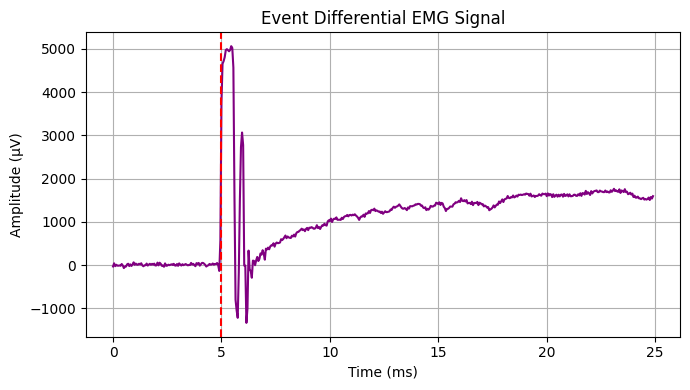

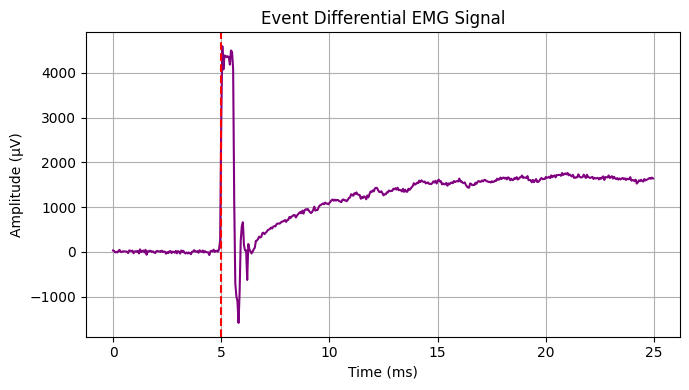

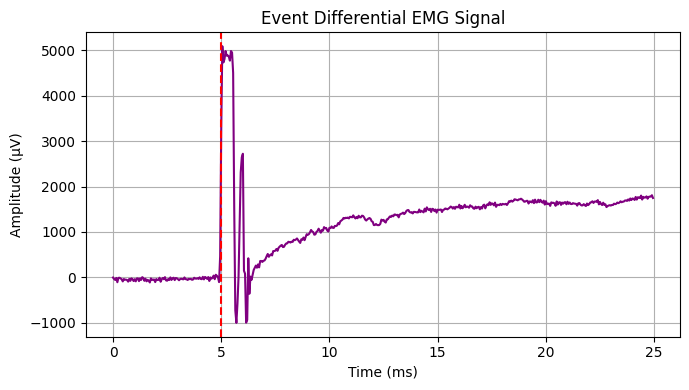

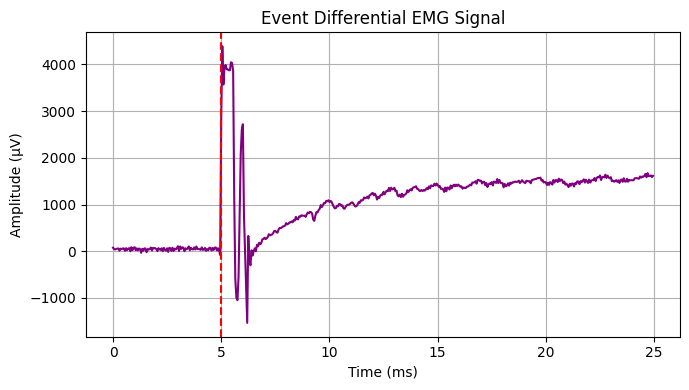

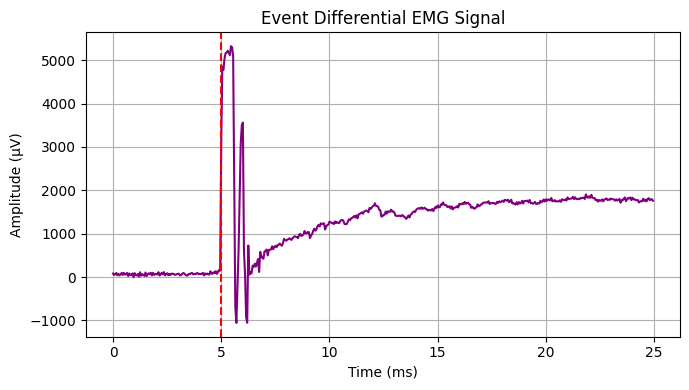

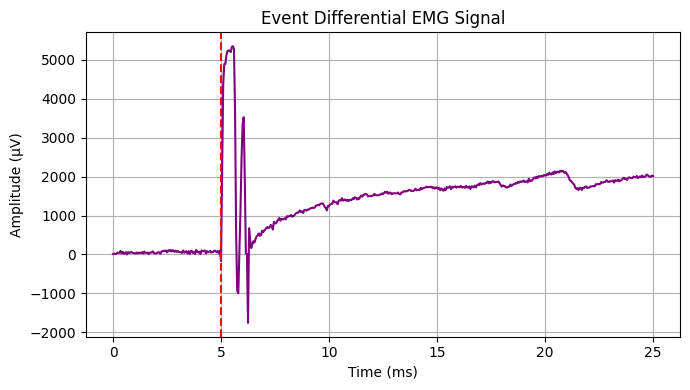

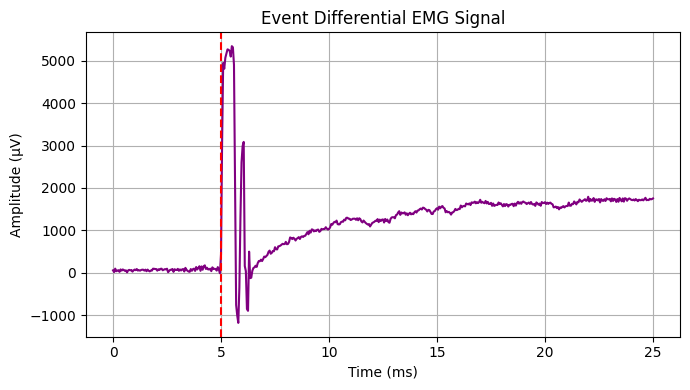

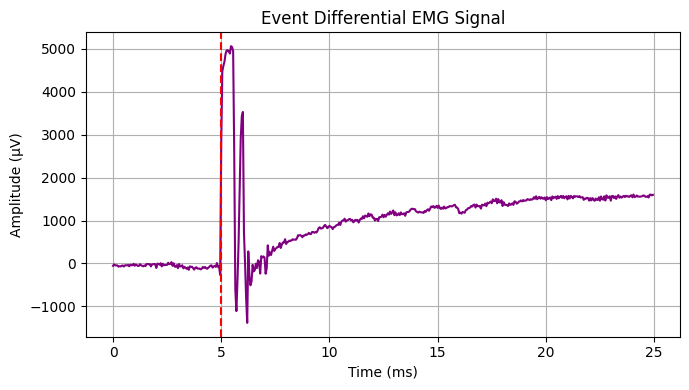

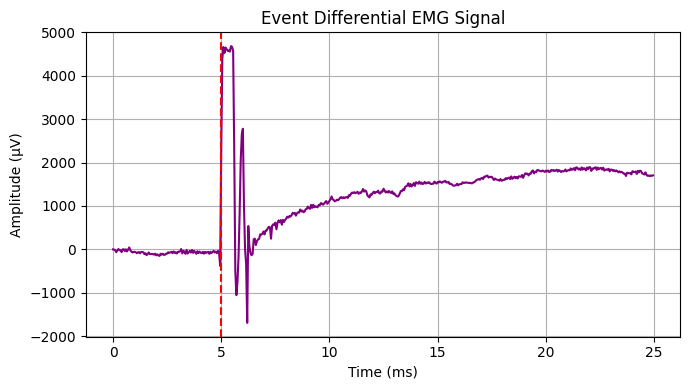

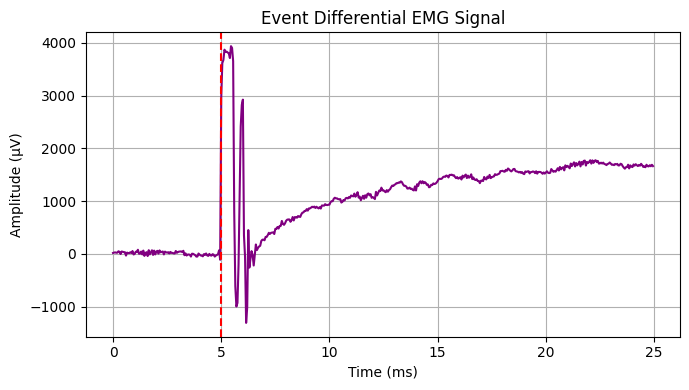

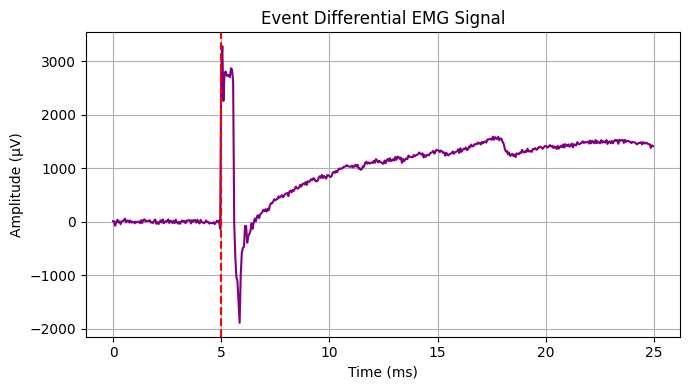

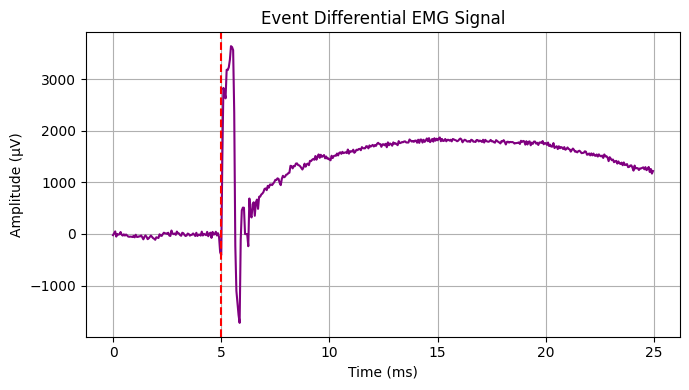

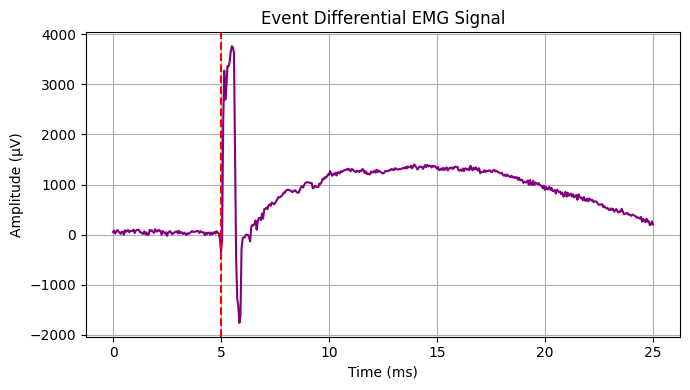

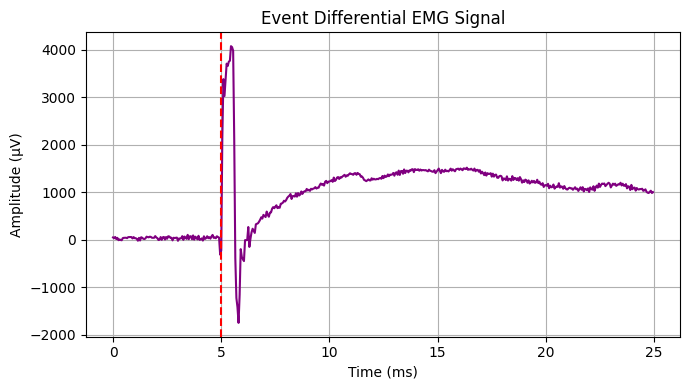

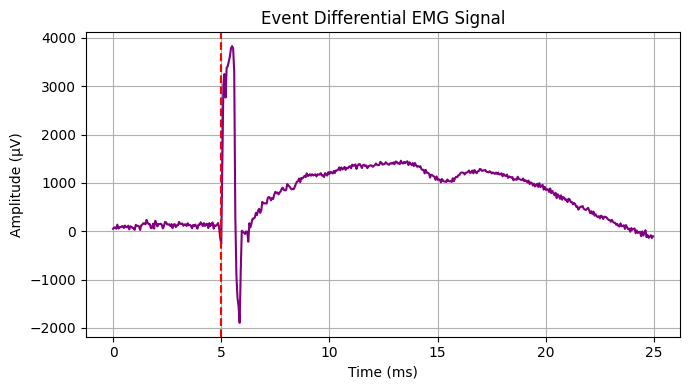

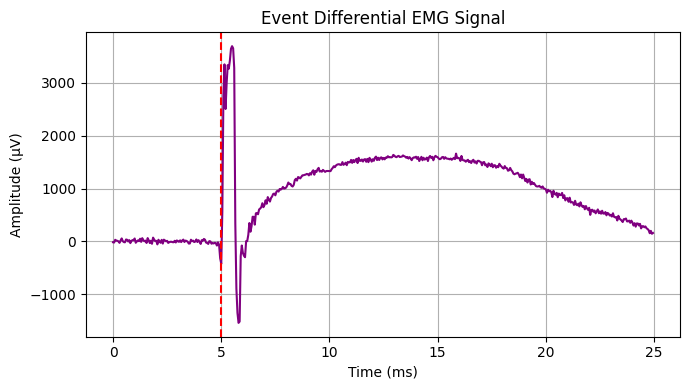

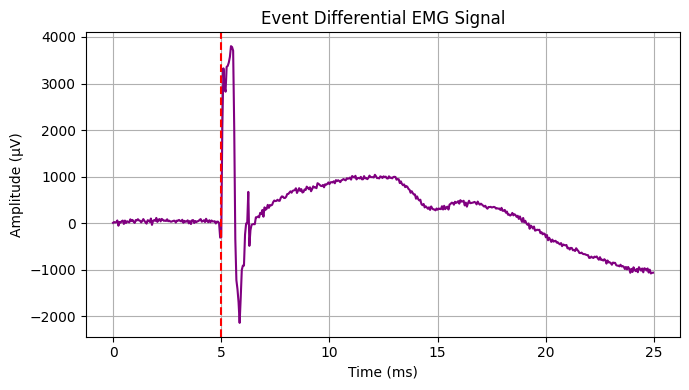

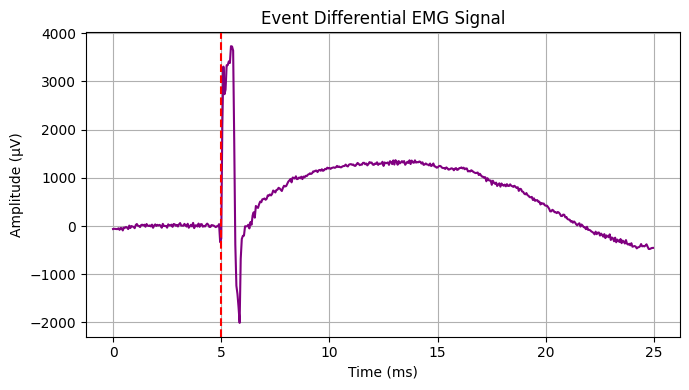

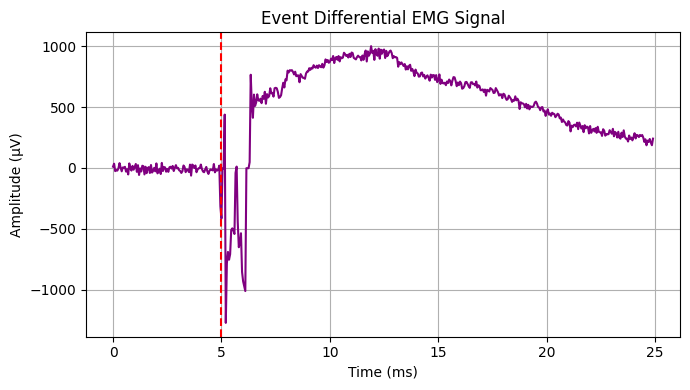

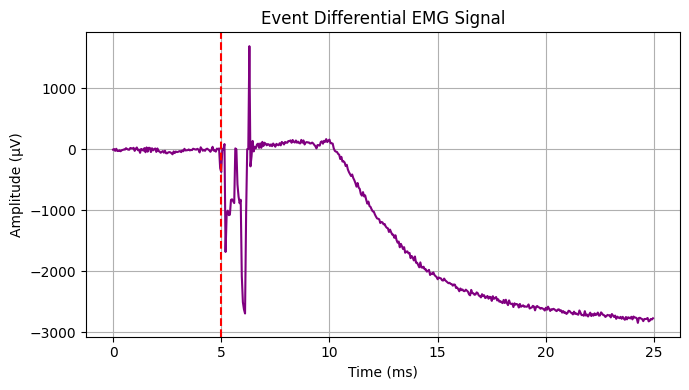

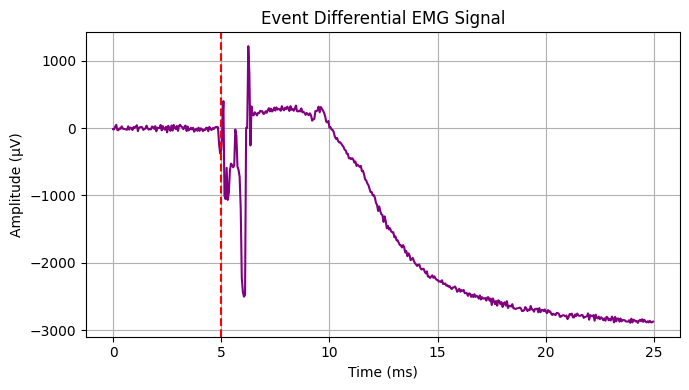

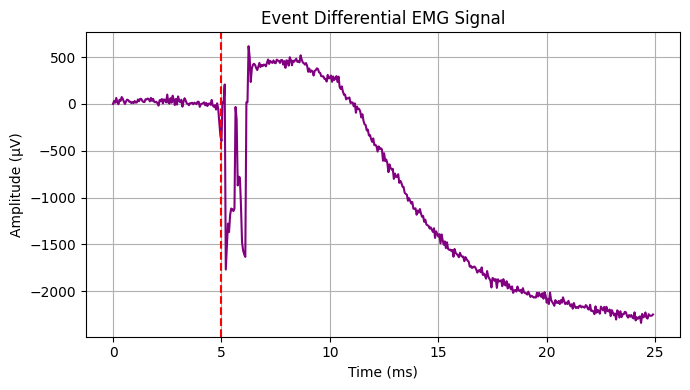

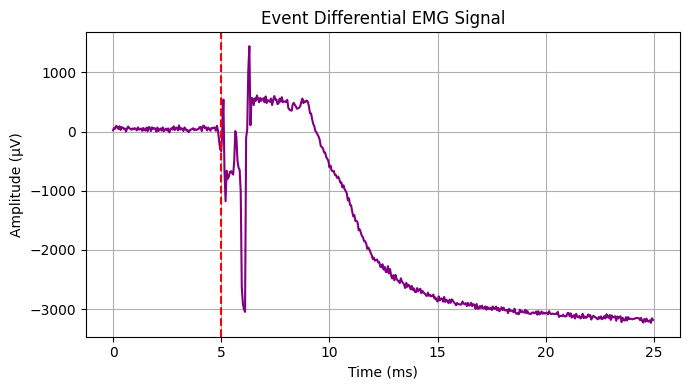

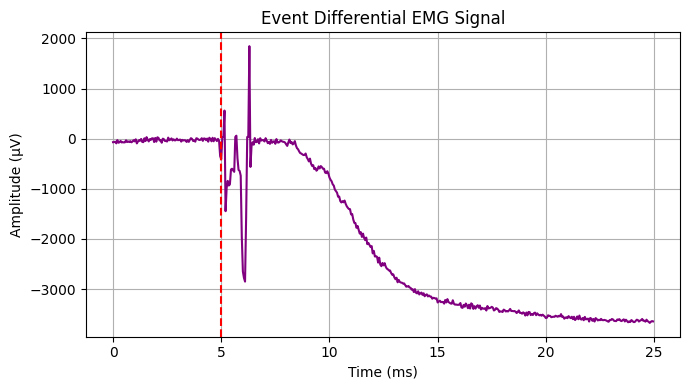

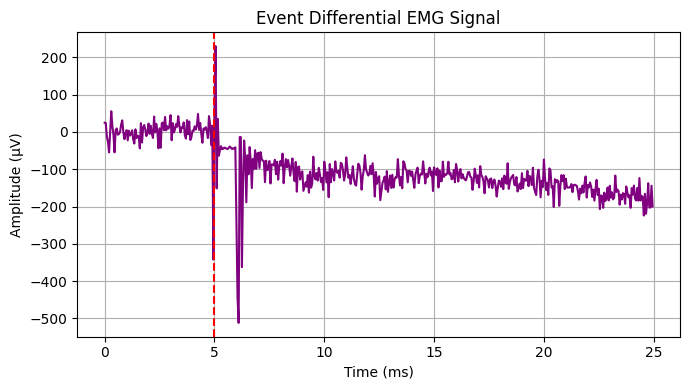

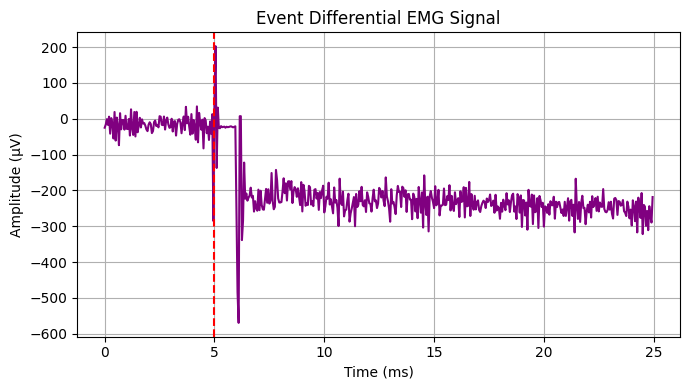

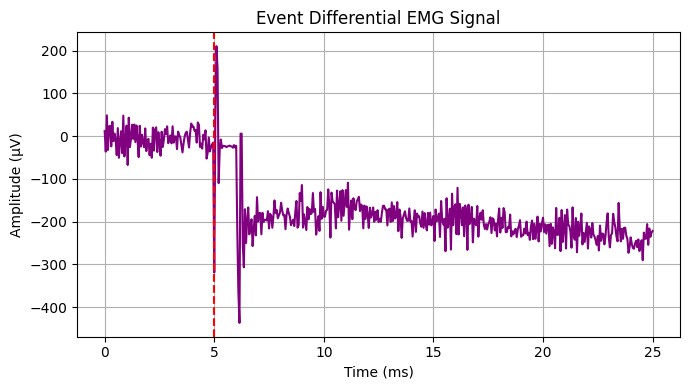

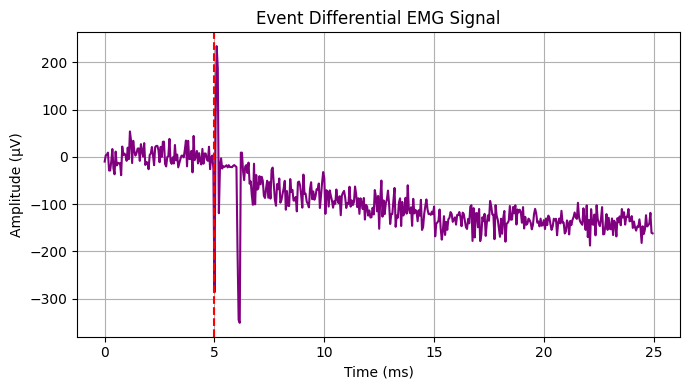

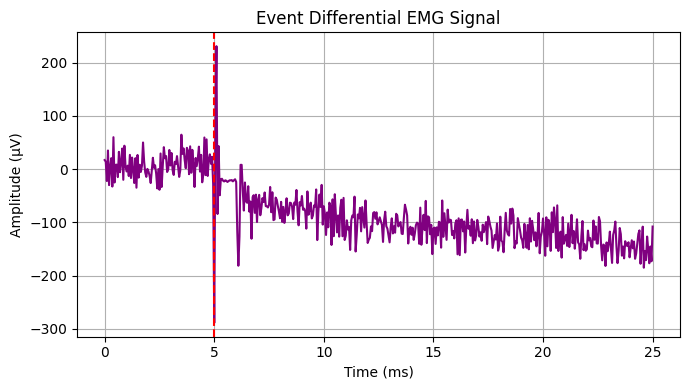

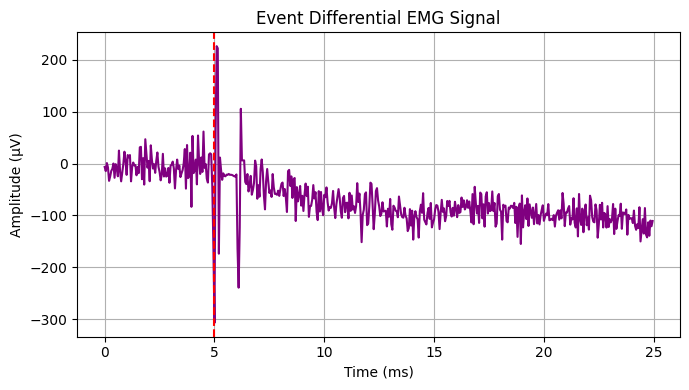

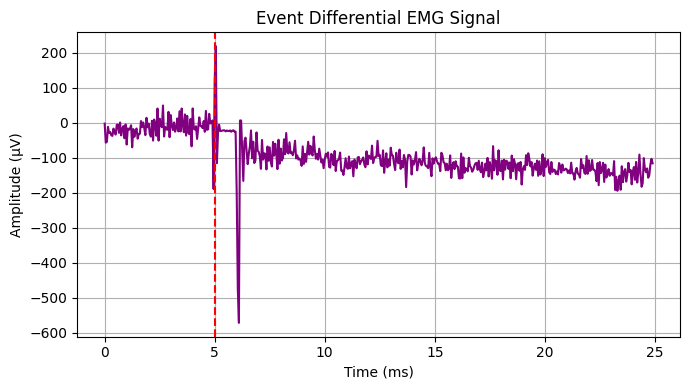

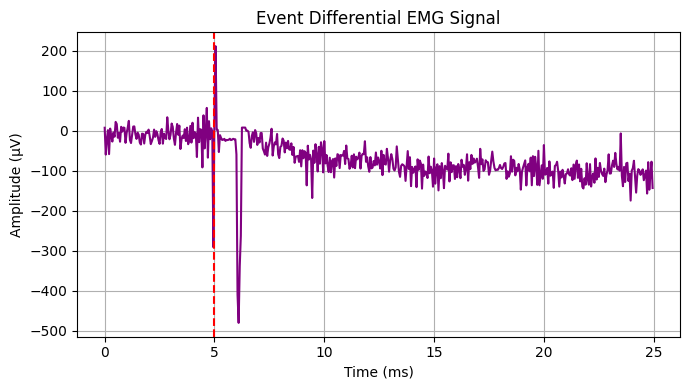

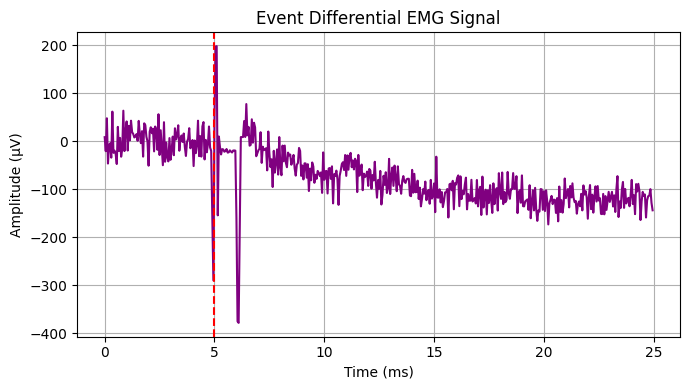

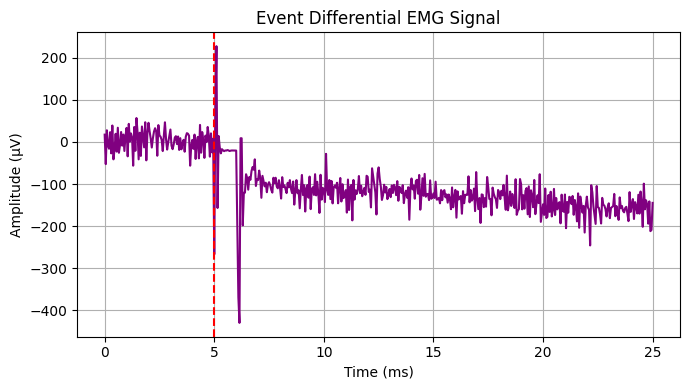

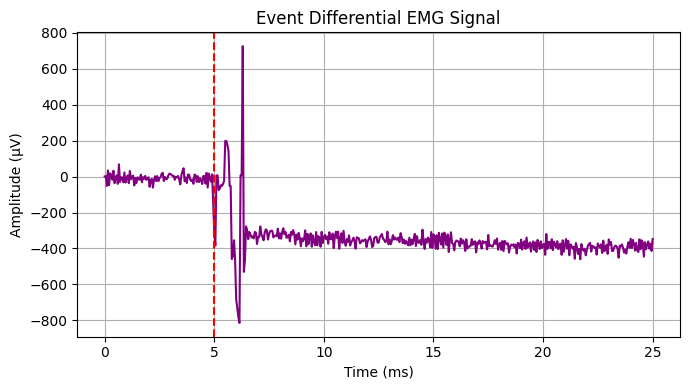

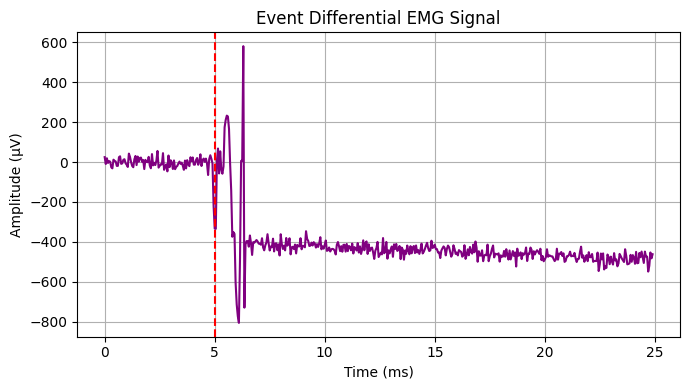

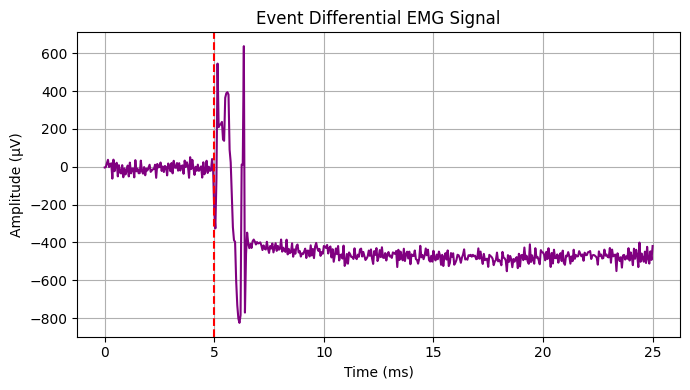

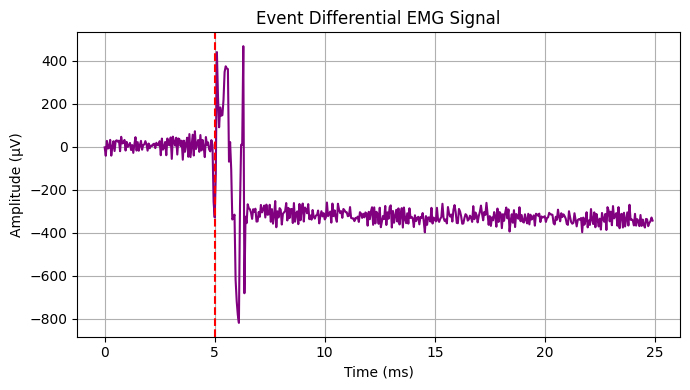

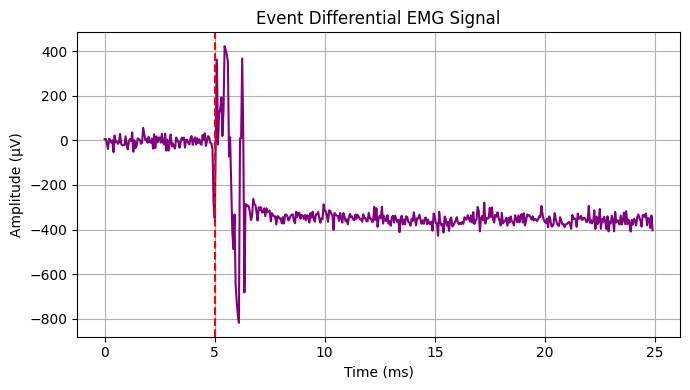

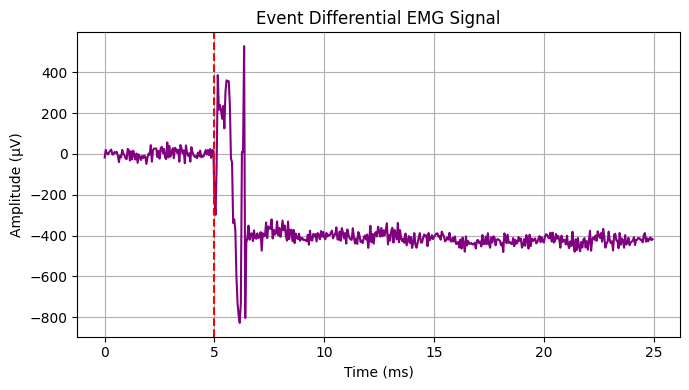

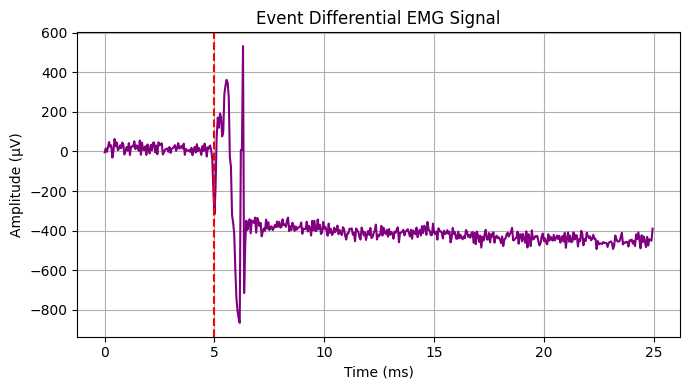

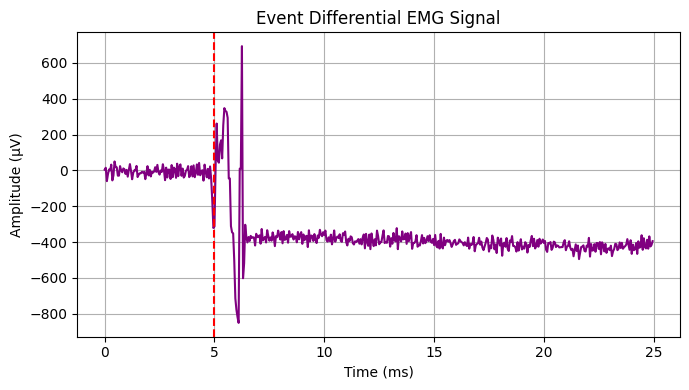

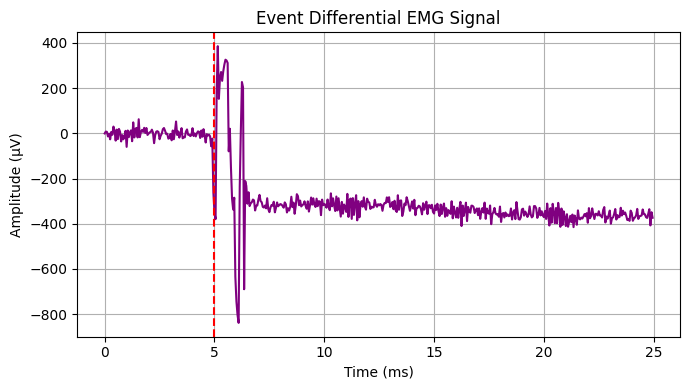

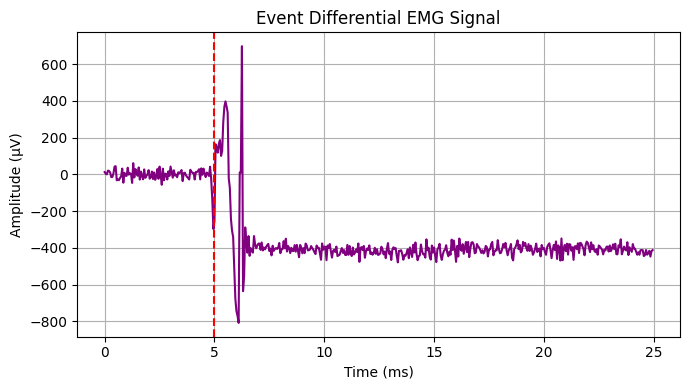

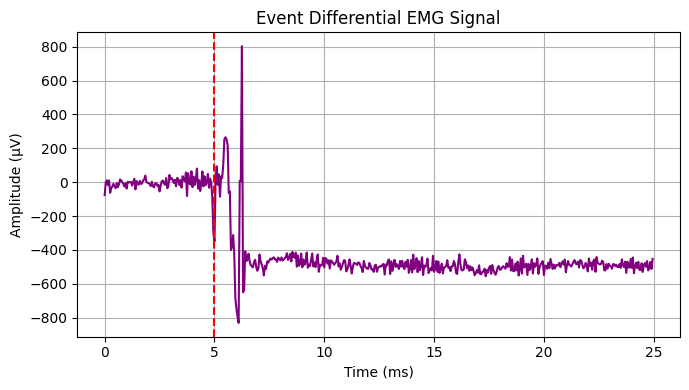

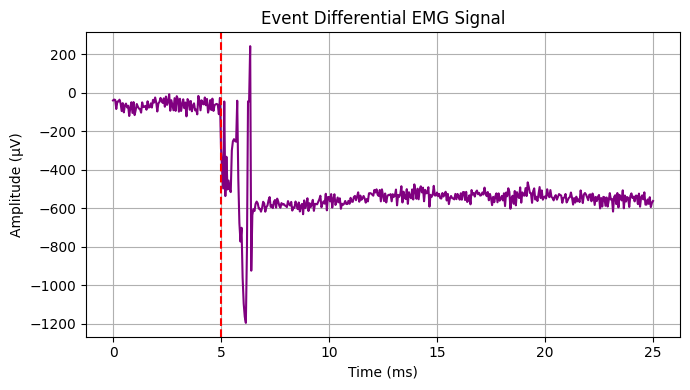

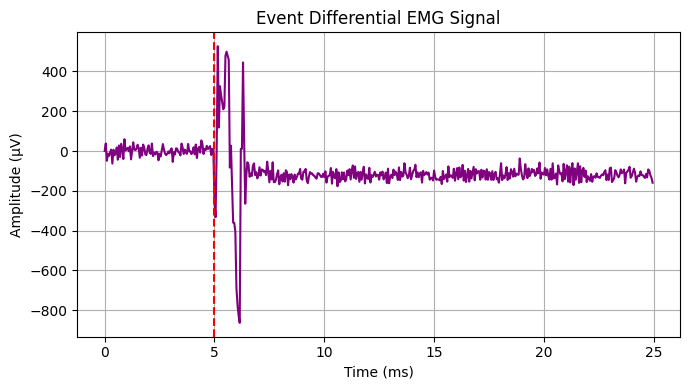

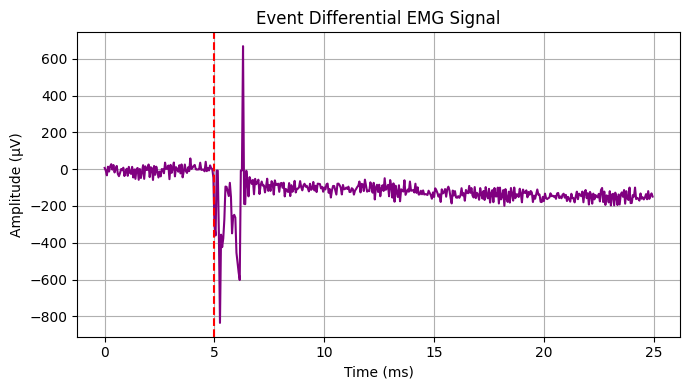

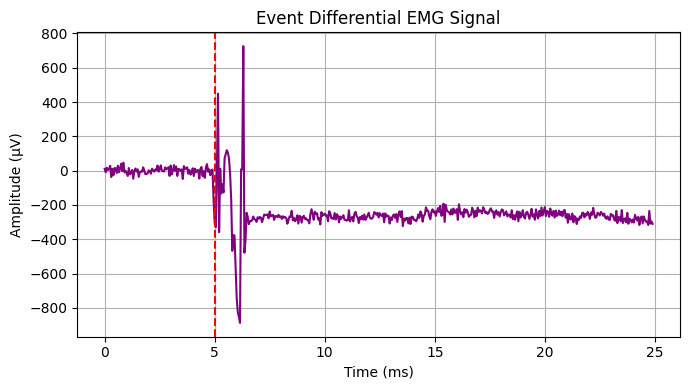

In [ ]:

pre_event_time = 5  #define time in ms to plot before the event
post_event_time = 20    #define time in ms to plot after the event
for stamp in sync_timestamps:    
    stamp_pre = stamp - pre_event_time/1000
    stamp_end = stamp + post_event_time/1000
    idx_event = np.where(timestamps >= stamp)[0][0]
    idx_start_pre = np.where(timestamps >= stamp_pre)[0][0]
    idx_end = np.where(timestamps >= stamp_end)[0][0]


    event_diff_emg = differential_emg[idx_start_pre:idx_end]
    
    time_ms = (np.arange(len(event_diff_emg)) / metadata['sample_rate']) * 1000
        
    plt.figure(figsize=(7, 4))
    plt.plot(time_ms, event_diff_emg, label="diff_emg", color='purple')
    plt.axvline(x=pre_event_time, color='red', linestyle='--', label='5 ms')
    plt.title("Event Differential EMG Signal")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (μV)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [4]:

'''
#==========Broken Code ==========#
 
import matplotlib.pyplot as plt
import numpy as np
from open_ephys.analysis import Session
import os
import re
from scipy.signal import butter, filtfilt, iirnotch

# ==== Select Session ====
w = 0
x = 3
y = f"recording{x + 1}"
v = f"Record Node 106" if w == 0 else f"Record Node 111"

# ==== Define Filters ====
def bandpass_filter(data, fs, lowcut=100, highcut=1000, order=4):
    nyq = 0.5 * fs
    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype='band')
    return filtfilt(b, a, data)

def notch_filter(data, fs, freq=60.0, Q=30.0):
    nyq = 0.5 * fs
    b, a = iirnotch(freq / nyq, Q)
    return filtfilt(b, a, data)

def full_filter(data, fs):
    return notch_filter(bandpass_filter(data, fs), fs)

# ==== Load Session ====
directory = 'ABATE-008_2025-05-14_14-34-09_001'
session = Session(directory)
print('Pass Initial Test, Moving on to Loading Session...\n')
print(session.recordnodes[w].recordings[x])

recording = session.recordnodes[w].recordings[x]
recording.add_sync_line(1, 100, 'Rhythm Data', main=True)
recording.compute_global_timestamps()

metadata = recording.continuous[0].metadata
channel_names = metadata['channel_names']
print("Channels:", channel_names, '\n')

timestamps = recording.continuous[0].timestamps
data = recording.continuous[0].get_samples(start_sample_index=0, end_sample_index=len(timestamps))
sample_rate = metadata['sample_rate']

# ==== Apply Filtering ====
emg1_raw = data[:, 2]  # CH7
emg2_raw = data[:, 3]  # CH11
emg1 = full_filter(emg1_raw, sample_rate)
emg2 = full_filter(emg2_raw, sample_rate)
differential_emg = emg1 - emg2

# ==== Extract Sync Events ====
events = recording.events
sync_events = events[(events.line == 1) & (events.processor_id == 100) &
                     (events.stream_name == 'Rhythm Data') & (events.state == 1)]
sync_timestamps = sync_events['timestamp'].to_numpy()

# ==== Load MessageCenter ====
messagecenter_dir = os.path.join(directory, v, "experiment1", y, "events", "MessageCenter")
texts = np.load(os.path.join(messagecenter_dir, "text.npy"), allow_pickle=True)
timestamps_msg = np.load(os.path.join(messagecenter_dir, "timestamps.npy"))
decoded_texts = [t.decode('utf-8') if isinstance(t, bytes) else str(t) for t in texts]
message_entries = list(zip(timestamps_msg, decoded_texts))
print(f"Loaded {len(decoded_texts)} MessageCenter entries")

# ==== Full Trace Plot ====
plt.figure(figsize=(15, 4))
plt.plot(timestamps, differential_emg, label="Filtered EMG1 - EMG2", color='purple')
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.title("Filtered Differential EMG Signal (EMG1 - EMG2)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (μV)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ==== Peri-Stimulus Analysis ====
pre_event_time = 5  # ms
post_event_time = 20  # ms
window_samples = int(((pre_event_time + post_event_time) / 1000) * sample_rate)
time_ms = np.linspace(-pre_event_time, post_event_time, window_samples)

peri_emg_segments = []
peri_emg1_segments = []
peri_emg2_segments = []
segment_timestamps = []

for stamp in sync_timestamps:
    idx_start = np.searchsorted(timestamps, stamp - pre_event_time / 1000)
    idx_end = idx_start + window_samples
    if idx_end <= len(differential_emg):
        seg_emg = differential_emg[idx_start:idx_end]
        seg_ch7 = emg1[idx_start:idx_end]
        seg_ch11 = emg2[idx_start:idx_end]
        if len(seg_emg) == window_samples:
            peri_emg_segments.append(seg_emg)
            peri_emg1_segments.append(seg_ch7)
            peri_emg2_segments.append(seg_ch11)
            segment_timestamps.append(stamp)

def find_latest_amplitude_msg(before_time):
    pattern = re.compile(r"starting at (\d+\.?\d*)\s*mA", re.IGNORECASE)
    for t, msg in reversed(message_entries):
        if t < before_time:
            match = pattern.search(msg)
            if match:
                return f"{match.group(1)} mA"
    return "Unknown"

# ==== Grouped Plotting ====
group_size = 5
n_groups = len(peri_emg_segments) // group_size

for i in range(n_groups):
    group_emg = peri_emg_segments[i * group_size : (i + 1) * group_size]
    group_ch7 = peri_emg1_segments[i * group_size : (i + 1) * group_size]
    group_ch11 = peri_emg2_segments[i * group_size : (i + 1) * group_size]
    group_stamps = segment_timestamps[i * group_size : (i + 1) * group_size]
    
    avg_emg = np.mean(group_emg, axis=0)
    amplitude = find_latest_amplitude_msg(group_stamps[0])

    plt.figure(figsize=(10, 6))
    legend_shown = set()
    for emg, ch7, ch11 in zip(group_emg, group_ch7, group_ch11):
        if 'EMG1-EMG2' not in legend_shown:
            plt.plot(time_ms, emg, color='red', alpha=0.6, label='EMG1-EMG2')
            legend_shown.add('EMG1-EMG2')
        else:
            plt.plot(time_ms, emg, color='red', alpha=0.6)

        if 'CH7' not in legend_shown:
            plt.plot(time_ms, ch7, color='blue', alpha=0.4, label='CH7')
            legend_shown.add('CH7')
        else:
            plt.plot(time_ms, ch7, color='blue', alpha=0.4)

        if 'CH11' not in legend_shown:
            plt.plot(time_ms, ch11, color='green', alpha=0.4, label='CH11')
            legend_shown.add('CH11')
        else:
            plt.plot(time_ms, ch11, color='green', alpha=0.4)

    plt.plot(time_ms, avg_emg, color='black', linewidth=2, label='Average EMG')
    plt.axvline(x=0, color='blue', linestyle='--', label='Stimulus Onset')
    plt.title(f"Peri-Stimulus Traces (Events {i*group_size+1}-{(i+1)*group_size}) | Stim Amp: {amplitude}")
    plt.xlabel("Time (ms)")
    plt.ylabel("Amplitude (μV)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
    '''

<>:107: SyntaxWarning: invalid escape sequence '\d'
<>:107: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dal866445\AppData\Local\Temp\ipykernel_56612\1837268269.py:107: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(r"starting at (\d+\.?\d*)\s*mA", re.IGNORECASE)


'\n#==========Broken Code ==========#\n\nimport matplotlib.pyplot as plt\nimport numpy as np\nfrom open_ephys.analysis import Session\nimport os\nimport re\nfrom scipy.signal import butter, filtfilt, iirnotch\n\n# ==== Select Session ====\nw = 0\nx = 3\ny = f"recording{x + 1}"\nv = f"Record Node 106" if w == 0 else f"Record Node 111"\n\n# ==== Define Filters ====\ndef bandpass_filter(data, fs, lowcut=100, highcut=1000, order=4):\n    nyq = 0.5 * fs\n    b, a = butter(order, [lowcut / nyq, highcut / nyq], btype=\'band\')\n    return filtfilt(b, a, data)\n\ndef notch_filter(data, fs, freq=60.0, Q=30.0):\n    nyq = 0.5 * fs\n    b, a = iirnotch(freq / nyq, Q)\n    return filtfilt(b, a, data)\n\ndef full_filter(data, fs):\n    return notch_filter(bandpass_filter(data, fs), fs)\n\n# ==== Load Session ====\ndirectory = \'ABATE-008_2025-05-14_14-34-09_001\'\nsession = Session(directory)\nprint(\'Pass Initial Test, Moving on to Loading Session...\n\')\nprint(session.recordnodes[w].recordings[x

In [15]:
import numpy as np

file_path = r"ABATE-008_2025-05-14_14-34-09_001\Record Node 106\experiment1\recording4\events\MessageCenter\text.npy"
texts = np.load(file_path, allow_pickle=True)

decoded_texts = [t.decode('utf-8') if isinstance(t, bytes) else str(t) for t in texts]

# Print and modify
for i, msg in enumerate(decoded_texts):
    print(f"{i}: {msg}")
'''decoded_texts[91] = "starting 0.75 mA"
decoded_texts[98] = "starting 0.50 mA"
decoded_texts[104] = "starting 0.40 mA"
decoded_texts[115] = "starting 0.20 mA"
decoded_texts[121] = "starting 0.10 mA"
decoded_texts[127] = "starting 0.08 mA"
decoded_texts[133] = "starting 0.06 mA"
decoded_texts[140] = "starting 0.04 mA"
decoded_texts[146] = "starting 0.02 mA"
decoded_texts[152] = "starting 0.01 mA"
decoded_texts[154] = "starting 1.0 mA"





# Save modified
encoded_texts = np.array([t.encode('utf-8') for t in decoded_texts], dtype=object)
np.save("text_modified.npy", encoded_texts)

#---------------


file_path = r"text_modified.npy"
texts = np.load(file_path, allow_pickle=True)

decoded_texts = [t.decode('utf-8') if isinstance(t, bytes) else str(t) for t in texts]

# Print and modify
for i, msg in enumerate(decoded_texts):
    print(f"{i}: {msg}")

'''

0: starting new recording
1: new cuff, smaller 26ga ground, no neck just mx twitch
2: fast settle on
3: starting at 0.5 mA
4: RHDCONTROL TRIGGER 1 100.0
5: RHDCONTROL TRIGGER 1 100.0
6: RHDCONTROL TRIGGER 1 100.0
7: RHDCONTROL TRIGGER 1 100.0
8: RHDCONTROL TRIGGER 1 100.0
9: starting at 0.6 mA
10: RHDCONTROL TRIGGER 1 100.0
11: RHDCONTROL TRIGGER 1 100.0
12: RHDCONTROL TRIGGER 1 100.0
13: RHDCONTROL TRIGGER 1 100.0
14: RHDCONTROL TRIGGER 1 100.0
15: starting at 0.7 mA
16: RHDCONTROL TRIGGER 1 100.0
17: RHDCONTROL TRIGGER 1 100.0
18: RHDCONTROL TRIGGER 1 100.0
19: RHDCONTROL TRIGGER 1 100.0
20: RHDCONTROL TRIGGER 1 100.0
21: starting at 0.8 mA
22: RHDCONTROL TRIGGER 1 100.0
23: RHDCONTROL TRIGGER 1 100.0
24: RHDCONTROL TRIGGER 1 100.0
25: RHDCONTROL TRIGGER 1 100.0
26: RHDCONTROL TRIGGER 1 100.0
27: starting at 0.9 mA
28: RHDCONTROL TRIGGER 1 100.0
29: RHDCONTROL TRIGGER 1 100.0
30: RHDCONTROL TRIGGER 1 100.0
31: RHDCONTROL TRIGGER 1 100.0
32: RHDCONTROL TRIGGER 1 100.0
33: starting at 

'decoded_texts[91] = "starting 0.75 mA"\ndecoded_texts[98] = "starting 0.50 mA"\ndecoded_texts[104] = "starting 0.40 mA"\ndecoded_texts[115] = "starting 0.20 mA"\ndecoded_texts[121] = "starting 0.10 mA"\ndecoded_texts[127] = "starting 0.08 mA"\ndecoded_texts[133] = "starting 0.06 mA"\ndecoded_texts[140] = "starting 0.04 mA"\ndecoded_texts[146] = "starting 0.02 mA"\ndecoded_texts[152] = "starting 0.01 mA"\ndecoded_texts[154] = "starting 1.0 mA"\n\n\n\n\n\n# Save modified\nencoded_texts = np.array([t.encode(\'utf-8\') for t in decoded_texts], dtype=object)\nnp.save("text_modified.npy", encoded_texts)\n\n#---------------\n\n\nfile_path = r"text_modified.npy"\ntexts = np.load(file_path, allow_pickle=True)\n\ndecoded_texts = [t.decode(\'utf-8\') if isinstance(t, bytes) else str(t) for t in texts]\n\n# Print and modify\nfor i, msg in enumerate(decoded_texts):\n    print(f"{i}: {msg}")\n\n'

In [9]:
import numpy as np
import re

# === Load Original Messages ===
file_path = r"ABATE-008_2025-05-14_14-34-09_001\Record Node 106\experiment1\recording1\events\MessageCenter\text.npy"
texts = np.load(file_path, allow_pickle=True)
decoded_texts = [t.decode('utf-8') if isinstance(t, bytes) else str(t) for t in texts]

# === Fix Amplitude Format ===
updated_texts = []
for i, msg in enumerate(decoded_texts):
    # Match patterns like "0.5 mA starting now", "1.0 mA starting now, now with fast settle enabled", etc.
    match = re.match(r"(?P<amp>\d+\.?\d*)\s*mA starting now(?P<extra>.*)", msg)
    if match:
        new_msg = f"starting {match.group('amp')} mA{match.group('extra')}"
        print(f"Fixing [{i}]: {msg} --> {new_msg}")
        updated_texts.append(new_msg)
    else:
        updated_texts.append(msg)

# === Save Modified Messages ===
encoded_texts = np.array([t.encode('utf-8') for t in updated_texts], dtype=object)
np.save("text_modified.npy", encoded_texts)

# === Optional: Print to Verify ===
print("\n--- Final Modified Messages ---")
for i, msg in enumerate(updated_texts):
    print(f"{i}: {msg}")


Fixing [24]: 2.0 mA starting now --> starting 2.0 mA
Fixing [36]: 1.5 mA starting now --> starting 1.5 mA
Fixing [49]: 1.0 mA starting now --> starting 1.0 mA
Fixing [63]: 0.5 mA starting now --> starting 0.5 mA
Fixing [71]: 0.1 mA starting now --> starting 0.1 mA
Fixing [78]: 0.1 mA starting now, now with fast settle enabled --> starting 0.1 mA, now with fast settle enabled
Fixing [82]: 0.01 mA starting now, now with fast settle enabled --> starting 0.01 mA, now with fast settle enabled
Fixing [90]: 0.01 mA starting now, now with fast settle disabled --> starting 0.01 mA, now with fast settle disabled

--- Final Modified Messages ---
0: RHDCONTROL TRIGGER 1 100.0
1: RHDCONTROL TRIGGER 1 100.0
2: RHDCONTROL TRIGGER 1 100.0
3: RHDCONTROL TRIGGER 1 100.0
4: RHDCONTROL TRIGGER 1 100.0
5: Laster several stims have been at 3 mA. Single Pulse 500us PW
6: RHDCONTROL TRIGGER 1 100.0
7: RHDCONTROL TRIGGER 1 100.0
8: Laster several stims have been at 3 mA. Single Pulse 500us PW
9: RHDCONTROL TRI